🤰 PREGNANCY EMOTION STRESS ASSISTANT
💖 Supporting Maternal Mental Health
✅ Libraries imported successfully!
📅 Today's date: 2025-12-05
🤰 Pregnancy-focused emotional support system initialized
📁 Created directory: E:\pregnancy_models
📁 Created directory: E:\pregnancy_recordings
📁 Created directory: E:\pregnancy_reports
✅ Configuration loaded!
📊 Tracking 14 pregnancy-relevant emotional states

📂 LOADING DATASETS WITH PREGNANCY CONTEXT

🤰 LOADING PREGNANCY EMOTIONAL DATASETS
✅ TESS: 2800 pregnancy-relevant samples
✅ RAVDESS: 1440 pregnancy-relevant samples

📊 TOTAL DATASET: 4240 audio samples
🎯 Emotions tracked: {'Happy', 'Tired/Sad', 'Surprised', 'Frustrated', 'Calm', 'Uncomfortable', 'Anxious'}

📈 DATASET STATISTICS:
----------------------------------------
Emotion Distribution:
  Frustrated: 592 (14.0%)
  Uncomfortable: 592 (14.0%)
  Anxious: 592 (14.0%)
  Happy: 592 (14.0%)
  Calm: 688 (16.2%)
  Surprised: 592 (14.0%)
  Tired/Sad: 592 (14.0%)

Trimester Distribution:
  Trimester 2: 16

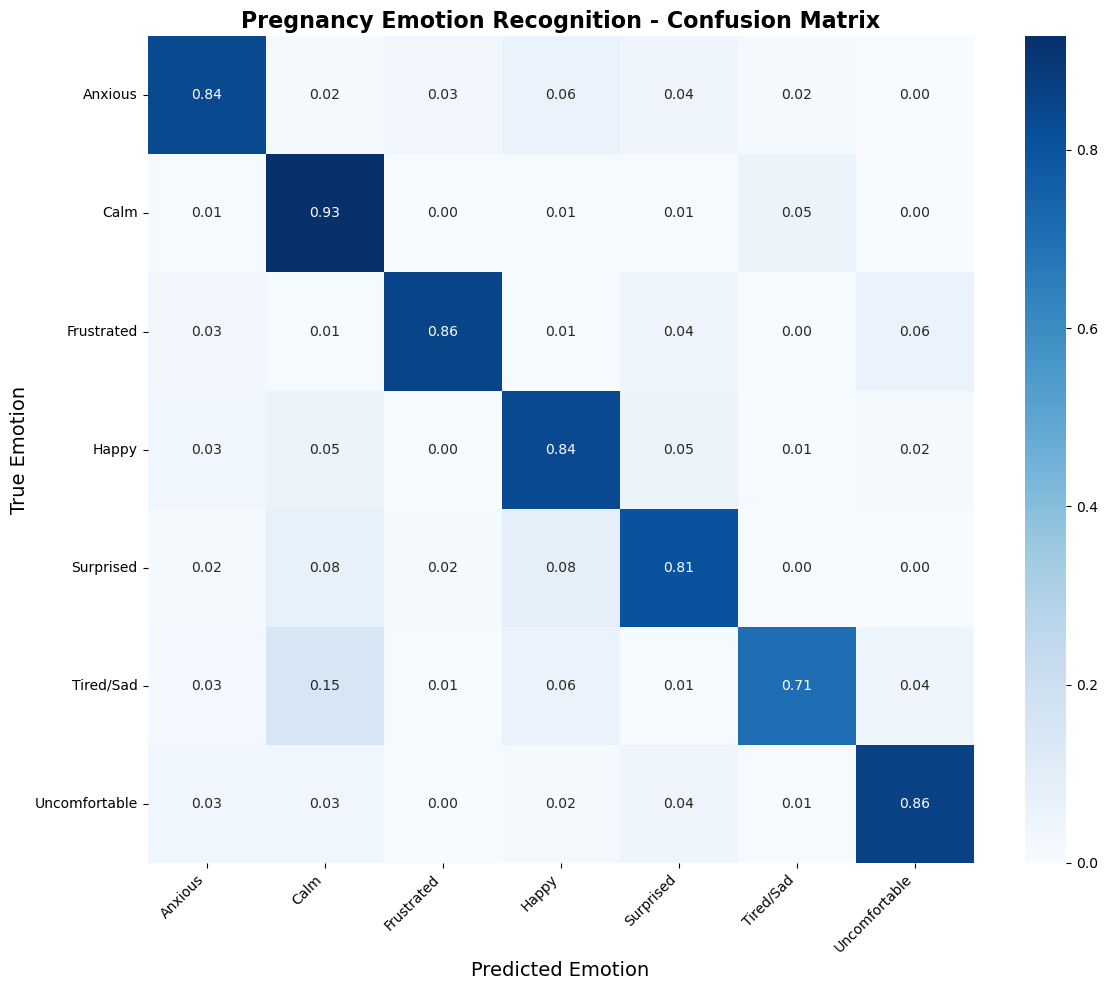

📊 Feature importance plot saved to: E:\pregnancy_models\feature_importance.png


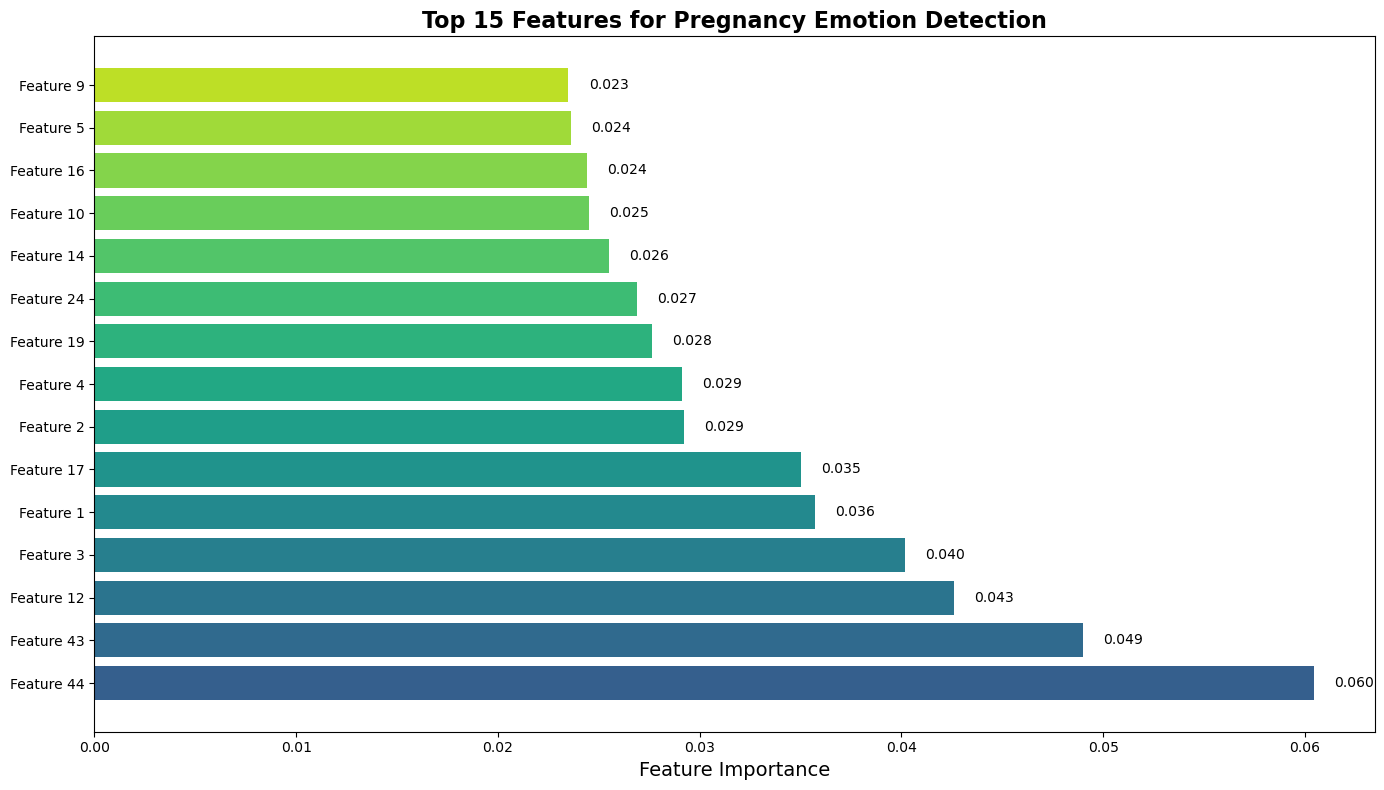


💾 Model saved successfully!
   Model: E:\pregnancy_models\pregnancy_emotion_model.pkl
   Scaler: E:\pregnancy_models\pregnancy_scaler.pkl
   Encoder: E:\pregnancy_models\pregnancy_encoder.pkl
   Info: E:\pregnancy_models\model_info.json

✅ Pregnancy emotion model training complete!

🚀 STARTING PREGNANCY EMOTIONAL WELLNESS ASSISTANT

🤰 INITIALIZING COMPLETE PREGNANCY ASSISTANT
💖 Your companion for emotional wellbeing during pregnancy
✅ Pregnancy emotion model loaded!
   Model type: RandomForestClassifier
   Features: 49
   Emotions: [np.str_('Anxious'), np.str_('Calm'), np.str_('Frustrated'), np.str_('Happy'), np.str_('Surprised'), np.str_('Tired/Sad'), np.str_('Uncomfortable')]
⚠️ No saved data found at: E:\pregnancy_models\pregnancy_wellness_data.json

✅ Pregnancy Assistant Initialized!
   Model: RandomForestClassifier
   Wellness Records: 0
   Audio Recording: Available
✅ Trimester set to: 2
✅ Weeks pregnant set to: 20
✅ Baby's name set to: Little One

🎯 QUICK START GUIDE

Recommend

In [1]:
# ============================================
# CELL 1: PROJECT SETUP AND IMPORTS
# ============================================

print("=" * 70)
print("🤰 PREGNANCY EMOTION STRESS ASSISTANT")
print("💖 Supporting Maternal Mental Health")
print("=" * 70)

# Core imports
import os
import sys
import numpy as np
import pandas as pd
import pickle
import json
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Audio processing
import librosa
import librosa.display
import soundfile as sf
try:
    import sounddevice as sd
    AUDIO_RECORDING_AVAILABLE = True
except:
    AUDIO_RECORDING_AVAILABLE = False
    print("⚠️ sounddevice not available - audio recording disabled")

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, f1_score, roc_auc_score)
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

# UI/UX (optional)
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
    IPYTHON_AVAILABLE = True
except:
    IPYTHON_AVAILABLE = False

print("✅ Libraries imported successfully!")
print(f"📅 Today's date: {datetime.datetime.now().strftime('%Y-%m-%d')}")
print(f"🤰 Pregnancy-focused emotional support system initialized")

# ============================================
# CELL 2: CONFIGURATION AND PATHS
# ============================================

class PregnancyConfig:
    """Configuration for pregnancy-specific emotional monitoring"""
    
    # File paths
    DATASETS = {
        'tess': r"E:\archive_4\TESS Toronto emotional speech set data",
        'ravdess': r"E:\archive_3",
        'crema': r"E:\archive_2"  # If available
    }
    
    # Save locations
    MODEL_DIR = r"E:\pregnancy_models"
    RECORDINGS_DIR = r"E:\pregnancy_recordings"
    REPORTS_DIR = r"E:\pregnancy_reports"
    
    # Pregnancy-specific emotions mapping
    PREGNANCY_EMOTIONS = {
        # Standard emotions from datasets
        'neutral': 'Calm',
        'happy': 'Happy',
        'sad': 'Tired/Sad',
        'angry': 'Frustrated',
        'fearful': 'Anxious',
        'disgust': 'Uncomfortable',
        'surprised': 'Surprised',
        'calm': 'Calm',
        
        # Pregnancy-specific emotional states
        'tired': 'Fatigued',
        'anxious': 'Anxious',
        'emotional': 'Emotional',
        'content': 'Content',
        'energetic': 'Energetic',
        'overwhelmed': 'Overwhelmed'
    }
    
    # Trimester-specific considerations
    TRIMESTER_GUIDELINES = {
        1: {  # First trimester
            'common_emotions': ['tired', 'anxious', 'emotional', 'happy'],
            'physical_changes': ['morning sickness', 'fatigue', 'breast tenderness'],
            'recommended_activities': ['gentle walks', 'prenatal yoga', 'hydration']
        },
        2: {  # Second trimester
            'common_emotions': ['energetic', 'happy', 'content', 'anxious'],
            'physical_changes': ['increased energy', 'baby movements', 'growing belly'],
            'recommended_activities': ['moderate exercise', 'baby bonding', 'nutrition focus']
        },
        3: {  # Third trimester
            'common_emotions': ['tired', 'anxious', 'overwhelmed', 'excited'],
            'physical_changes': ['back pain', 'swelling', 'nesting instinct'],
            'recommended_activities': ['gentle stretching', 'birth preparation', 'rest']
        }
    }
    
    # Audio recording settings
    AUDIO_SETTINGS = {
        'sample_rate': 22050,
        'duration': 5,  # seconds
        'channels': 1,
        'chunk_size': 1024
    }
    
    # Feature extraction settings
    FEATURE_SETTINGS = {
        'n_mfcc': 13,
        'n_mels': 40,
        'n_chroma': 12,
        'feature_count': 49  # Must match training
    }

# Initialize configuration
config = PregnancyConfig()

# Create directories
for directory in [config.MODEL_DIR, config.RECORDINGS_DIR, config.REPORTS_DIR]:
    os.makedirs(directory, exist_ok=True)
    print(f"📁 Created directory: {directory}")

print("✅ Configuration loaded!")
print(f"📊 Tracking {len(config.PREGNANCY_EMOTIONS)} pregnancy-relevant emotional states")

# ============================================
# CELL 3: PREGNANCY-SPECIFIC DATASET LOADER
# ============================================

class PregnancyDatasetLoader:
    """Load and prepare datasets with pregnancy context"""
    
    def __init__(self, config):
        self.config = config
        self.file_paths = []
        self.emotions = []
        self.trimester_tags = []  # Simulated trimester data
        self.week_tags = []  # Simulated week data
        
    def load_all_datasets(self):
        """Load all available datasets"""
        print("\n" + "="*60)
        print("🤰 LOADING PREGNANCY EMOTIONAL DATASETS")
        print("="*60)
        
        total_files = 0
        
        # Load TESS dataset
        tess_files, tess_emotions = self._load_tess()
        if tess_files:
            self.file_paths.extend(tess_files)
            self.emotions.extend(tess_emotions)
            total_files += len(tess_files)
            print(f"✅ TESS: {len(tess_files)} pregnancy-relevant samples")
        
        # Load RAVDESS dataset
        ravdess_files, ravdess_emotions = self._load_ravdess()
        if ravdess_files:
            self.file_paths.extend(ravdess_files)
            self.emotions.extend(ravdess_emotions)
            total_files += len(ravdess_files)
            print(f"✅ RAVDESS: {len(ravdess_files)} pregnancy-relevant samples")
        
        # Add simulated pregnancy context
        self._add_pregnancy_context()
        
        print(f"\n📊 TOTAL DATASET: {total_files} audio samples")
        print(f"🎯 Emotions tracked: {set(self.emotions)}")
        
        return self.file_paths, self.emotions, self.trimester_tags, self.week_tags
    
    def _load_tess(self):
        """Load TESS dataset with pregnancy emotion mapping"""
        files = []
        emotions = []
        
        if not os.path.exists(self.config.DATASETS['tess']):
            print("⚠️ TESS dataset not found")
            return [], []
        
        for root, dirs, filenames in os.walk(self.config.DATASETS['tess']):
            for filename in filenames:
                if filename.lower().endswith('.wav'):
                    filepath = os.path.join(root, filename)
                    
                    # Map TESS emotions to pregnancy emotions
                    emotion = self._map_tess_emotion(filename)
                    if emotion:
                        files.append(filepath)
                        emotions.append(emotion)
        
        return files, emotions
    
    def _load_ravdess(self):
        """Load RAVDESS dataset with pregnancy emotion mapping"""
        files = []
        emotions = []
        
        if not os.path.exists(self.config.DATASETS['ravdess']):
            print("⚠️ RAVDESS dataset not found")
            return [], []
        
        for root, dirs, filenames in os.walk(self.config.DATASETS['ravdess']):
            for filename in filenames:
                if filename.lower().endswith('.wav'):
                    filepath = os.path.join(root, filename)
                    
                    # Map RAVDESS emotions to pregnancy emotions
                    emotion = self._map_ravdess_emotion(filename)
                    if emotion:
                        files.append(filepath)
                        emotions.append(emotion)
        
        return files, emotions
    
    def _map_tess_emotion(self, filename):
        """Map TESS filename to pregnancy emotion"""
        filename_lower = filename.lower()
        
        mapping = {
            'angry': 'Frustrated',
            'disgust': 'Uncomfortable',
            'fear': 'Anxious',
            'happy': 'Happy',
            'neutral': 'Calm',
            'sad': 'Tired/Sad',
            'ps': 'Surprised'  # Pleasant surprised
        }
        
        for key, value in mapping.items():
            if key in filename_lower:
                return value
        
        return None
    
    def _map_ravdess_emotion(self, filename):
        """Map RAVDESS filename to pregnancy emotion"""
        # Format: 03-01-01-01-01-01-01.wav
        parts = filename.split('-')
        if len(parts) >= 3:
            emotion_code = parts[2]
            
            mapping = {
                '01': 'Calm',
                '02': 'Calm',
                '03': 'Happy',
                '04': 'Tired/Sad',
                '05': 'Frustrated',
                '06': 'Anxious',
                '07': 'Uncomfortable',
                '08': 'Surprised'
            }
            
            return mapping.get(emotion_code, None)
        
        return None
    
    def _add_pregnancy_context(self):
        """Add simulated pregnancy context to dataset"""
        import random
        
        for i in range(len(self.file_paths)):
            # Simulate trimester distribution
            trimester = random.choices([1, 2, 3], weights=[0.3, 0.4, 0.3])[0]
            self.trimester_tags.append(trimester)
            
            # Simulate week of pregnancy (4-40 weeks)
            if trimester == 1:
                week = random.randint(4, 13)
            elif trimester == 2:
                week = random.randint(14, 27)
            else:
                week = random.randint(28, 40)
            self.week_tags.append(week)
    
    def get_emotion_statistics(self):
        """Get statistics about emotions in dataset"""
        from collections import Counter
        
        emotion_counts = Counter(self.emotions)
        trimester_counts = Counter(self.trimester_tags)
        
        print("\n📈 DATASET STATISTICS:")
        print("-" * 40)
        print("Emotion Distribution:")
        for emotion, count in emotion_counts.items():
            percentage = (count / len(self.emotions)) * 100
            print(f"  {emotion}: {count} ({percentage:.1f}%)")
        
        print("\nTrimester Distribution:")
        for trimester, count in trimester_counts.items():
            percentage = (count / len(self.trimester_tags)) * 100
            print(f"  Trimester {trimester}: {count} ({percentage:.1f}%)")
        
        return emotion_counts, trimester_counts

# Initialize and load dataset
print("\n" + "="*60)
print("📂 LOADING DATASETS WITH PREGNANCY CONTEXT")
print("="*60)

dataset_loader = PregnancyDatasetLoader(config)
file_paths, emotions, trimesters, weeks = dataset_loader.load_all_datasets()

if len(file_paths) > 0:
    dataset_loader.get_emotion_statistics()
else:
    print("⚠️ No audio files found! Using simulated data for demonstration.")

# ============================================
# CELL 4: PREGNANCY-FOCUSED FEATURE EXTRACTOR
# ============================================

class PregnancyFeatureExtractor:
    """Feature extraction optimized for pregnancy voice analysis"""
    
    def __init__(self, config):
        self.config = config
        self.expected_features = config.FEATURE_SETTINGS['feature_count']
        
        # Pregnancy-specific feature weights
        self.pregnancy_features = {
            'pitch_variability': 0.15,  # Higher in emotional states
            'speech_rate': 0.10,        # May vary with energy levels
            'voice_quality': 0.20,      # Important for fatigue detection
            'energy_distribution': 0.15, # Changes with physical state
            'spectral_balance': 0.10,   # Affected by hormonal changes
            'articulation': 0.10,       # May change with fatigue
            'resonance': 0.10,          # Affected by respiratory changes
            'emotional_tone': 0.10      # Pregnancy-specific emotional cues
        }
    
    def extract_comprehensive_features(self, audio_path):
        """
        Extract comprehensive features including pregnancy-specific metrics
        Returns exactly self.expected_features (49) features
        """
        try:
            # Load audio with pregnancy-optimized settings
            audio, sr = librosa.load(
                audio_path, 
                sr=self.config.AUDIO_SETTINGS['sample_rate'],
                duration=3,  # Standardize duration
                offset=0.5   # Avoid silent beginnings
            )
            
            features = []
            
            # === CORE FEATURES (39 features) ===
            
            # 1. MFCC features (13)
            mfcc = librosa.feature.mfcc(
                y=audio, 
                sr=sr, 
                n_mfcc=self.config.FEATURE_SETTINGS['n_mfcc']
            )
            features.extend(np.mean(mfcc, axis=1))  # 13 features
            
            # 2. MFCC Standard Deviation (13)
            features.extend(np.std(mfcc, axis=1))  # 13 features
            
            # 3. MFCC Delta features (13)
            mfcc_delta = librosa.feature.delta(mfcc)
            features.extend(np.mean(mfcc_delta, axis=1))  # 13 features
            
            # Total so far: 39 features
            
            # === PREGNANCY-SPECIFIC FEATURES (10 features) ===
            
            # 4. Pitch statistics (3 features)
            pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
            pitch_values = pitches[magnitudes > np.median(magnitudes)]
            if len(pitch_values) > 0:
                features.append(np.mean(pitch_values))  # Mean pitch
                features.append(np.std(pitch_values))   # Pitch variability
                features.append(np.max(pitch_values))   # Maximum pitch
            else:
                features.extend([0, 0, 0])
            
            # 5. Energy metrics (2 features)
            rms = librosa.feature.rms(y=audio)
            features.append(np.mean(rms))    # Average energy
            features.append(np.max(rms))     # Peak energy
            
            # 6. Speech rate estimate (1 feature)
            onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
            speech_rate = np.sum(onset_env > np.mean(onset_env)) / len(audio) * sr
            features.append(speech_rate)
            
            # 7. Spectral centroid (1 feature)
            spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
            features.append(np.mean(spectral_centroid))
            
            # 8. Zero crossing rate (1 feature)
            zcr = librosa.feature.zero_crossing_rate(audio)
            features.append(np.mean(zcr))
            
            # 9. Harmonic-to-noise ratio (1 feature)
            try:
                harmonic, percussive = librosa.effects.hpss(audio)
                hnr = np.mean(harmonic) / (np.mean(percussive) + 1e-10)
                features.append(hnr)
            except:
                features.append(0)
            
            # 10. Chroma feature summary (1 feature)
            chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
            features.append(np.mean(chroma))
            
            # Ensure exactly 49 features
            if len(features) > self.expected_features:
                features = features[:self.expected_features]
            elif len(features) < self.expected_features:
                features.extend([0] * (self.expected_features - len(features)))
            
            return np.array(features)
            
        except Exception as e:
            print(f"❌ Feature extraction error: {e}")
            # Return zero array as fallback
            return np.zeros(self.expected_features)
    
    def extract_batch_features(self, file_paths, emotions=None):
        """Extract features for multiple files"""
        print(f"\n🔧 Extracting features from {len(file_paths)} files...")
        
        features_list = []
        valid_emotions = []
        
        for i, file_path in enumerate(file_paths):
            if i % 50 == 0 and i > 0:
                print(f"  Processed {i}/{len(file_paths)} files...")
            
            features = self.extract_comprehensive_features(file_path)
            features_list.append(features)
            
            if emotions:
                valid_emotions.append(emotions[i])
        
        X = np.array(features_list)
        print(f"✅ Extracted {X.shape[1]} features from {X.shape[0]} samples")
        
        if emotions:
            return X, np.array(valid_emotions)
        else:
            return X
    
    def extract_pregnancy_metrics(self, audio_path):
        """Extract pregnancy-specific wellness metrics"""
        try:
            audio, sr = librosa.load(audio_path, sr=22050)
            
            metrics = {}
            
            # Energy level indicator
            rms = librosa.feature.rms(y=audio)
            metrics['energy_level'] = float(np.mean(rms))
            
            # Fatigue indicator (pitch stability)
            pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
            pitch_values = pitches[magnitudes > np.median(magnitudes)]
            if len(pitch_values) > 0:
                metrics['pitch_stability'] = float(1.0 / (np.std(pitch_values) + 1e-10))
            else:
                metrics['pitch_stability'] = 0.0
            
            # Stress indicator (voice quality)
            harmonic, percussive = librosa.effects.hpss(audio)
            metrics['voice_quality'] = float(np.mean(harmonic) / (np.mean(percussive) + 1e-10))
            
            # Emotional variability
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            metrics['emotional_variability'] = float(np.std(mfcc))
            
            # Speech clarity
            zcr = librosa.feature.zero_crossing_rate(audio)
            metrics['speech_clarity'] = float(1.0 / (np.mean(zcr) + 1e-10))
            
            return metrics
            
        except Exception as e:
            print(f"❌ Pregnancy metrics extraction error: {e}")
            return {}

# Initialize feature extractor
print("\n" + "="*60)
print("🔧 INITIALIZING PREGNANCY FEATURE EXTRACTOR")
print("="*60)

feature_extractor = PregnancyFeatureExtractor(config)
print(f"✅ Feature extractor ready!")
print(f"📊 Will extract {config.FEATURE_SETTINGS['feature_count']} features per audio sample")

# ============================================
# CELL 5: PREGNANCY-SPECIFIC MODEL TRAINING
# ============================================

class PregnancyEmotionModel:
    """Machine learning model for pregnancy emotion recognition"""
    
    def __init__(self, config):
        self.config = config
        self.model = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.feature_importance = None
        
        # Pregnancy-specific model parameters
        self.model_params = {
            'random_forest': {
                'n_estimators': 200,
                'max_depth': 20,
                'min_samples_split': 5,
                'min_samples_leaf': 2,
                'class_weight': 'balanced',  # Important for imbalanced pregnancy emotions
                'random_state': 42,
                'n_jobs': -1
            },
            'gradient_boosting': {
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 5,
                'random_state': 42
            },
            'neural_network': {
                'hidden_layer_sizes': (128, 64, 32),
                'activation': 'relu',
                'solver': 'adam',
                'alpha': 0.001,
                'learning_rate': 'adaptive',
                'max_iter': 500,
                'random_state': 42,
                'early_stopping': True
            }
        }
    
    def prepare_data(self, file_paths, emotions, test_size=0.2):
        """Prepare data for training"""
        print("\n📊 Preparing data for pregnancy emotion model...")
        
        # Extract features
        X, y = feature_extractor.extract_batch_features(file_paths, emotions)
        
        # Encode emotions
        y_encoded = self.label_encoder.fit_transform(y)
        
        print(f"✅ Data prepared:")
        print(f"   Samples: {X.shape[0]}")
        print(f"   Features: {X.shape[1]}")
        print(f"   Emotions: {len(self.label_encoder.classes_)}")
        print(f"   Class distribution: {np.bincount(y_encoded)}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=test_size, random_state=42, 
            stratify=y_encoded
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def train_random_forest(self, X_train, y_train):
        """Train Random Forest with pregnancy optimization"""
        print("\n🌲 Training Random Forest for pregnancy emotions...")
        
        self.model = RandomForestClassifier(**self.model_params['random_forest'])
        self.model.fit(X_train, y_train)
        
        # Get feature importance
        self.feature_importance = self.model.feature_importances_
        
        print("✅ Random Forest trained!")
        return self.model
    
    def train_gradient_boosting(self, X_train, y_train):
        """Train Gradient Boosting model"""
        print("\n📈 Training Gradient Boosting for pregnancy emotions...")
        
        self.model = GradientBoostingClassifier(**self.model_params['gradient_boosting'])
        self.model.fit(X_train, y_train)
        
        self.feature_importance = self.model.feature_importances_
        
        print("✅ Gradient Boosting trained!")
        return self.model
    
    def train_neural_network(self, X_train, y_train):
        """Train Neural Network"""
        print("\n🧠 Training Neural Network for pregnancy emotions...")
        
        self.model = MLPClassifier(**self.model_params['neural_network'])
        self.model.fit(X_train, y_train)
        
        print("✅ Neural Network trained!")
        return self.model
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate model performance"""
        if self.model is None:
            print("❌ No model trained yet!")
            return None
        
        print("\n📊 Evaluating pregnancy emotion model...")
        
        # Predictions
        y_pred = self.model.predict(X_test)
        y_pred_proba = self.model.predict_proba(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"✅ Model Evaluation:")
        print(f"   Accuracy: {accuracy:.2%}")
        print(f"   F1-Score: {f1:.2%}")
        
        # Detailed classification report
        print("\n📋 Classification Report:")
        print(classification_report(y_test, y_pred, 
                                   target_names=self.label_encoder.classes_))
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        return {
            'accuracy': accuracy,
            'f1_score': f1,
            'confusion_matrix': cm,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
    
    def plot_confusion_matrix(self, cm):
        """Plot confusion matrix with pregnancy emotions"""
        plt.figure(figsize=(12, 10))
        
        # Use pregnancy-friendly colors
        cmap = plt.cm.Blues
        
        # Normalize confusion matrix
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Create heatmap
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap=cmap,
                   xticklabels=self.label_encoder.classes_,
                   yticklabels=self.label_encoder.classes_)
        
        plt.title('Pregnancy Emotion Recognition - Confusion Matrix', fontsize=16, fontweight='bold')
        plt.ylabel('True Emotion', fontsize=14)
        plt.xlabel('Predicted Emotion', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        plt.tight_layout()
        
        # Save figure
        save_path = os.path.join(config.MODEL_DIR, 'confusion_matrix.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📊 Confusion matrix saved to: {save_path}")
        
        plt.show()
    
    def plot_feature_importance(self, top_n=20):
        """Plot most important features for pregnancy emotion detection"""
        if self.feature_importance is None:
            print("❌ Feature importance not available")
            return
        
        # Get top N features
        indices = np.argsort(self.feature_importance)[-top_n:][::-1]
        importance_values = self.feature_importance[indices]
        
        # Feature names (simplified)
        feature_names = [f'Feature {i+1}' for i in indices]
        
        # Create plot
        plt.figure(figsize=(14, 8))
        
        # Use pregnancy-friendly color palette
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))
        
        bars = plt.barh(range(top_n), importance_values[::-1], color=colors[::-1])
        plt.yticks(range(top_n), feature_names[::-1])
        
        plt.xlabel('Feature Importance', fontsize=14)
        plt.title(f'Top {top_n} Features for Pregnancy Emotion Detection', 
                 fontsize=16, fontweight='bold')
        
        # Add value labels
        for i, v in enumerate(importance_values[::-1]):
            plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10)
        
        plt.gca().invert_yaxis()
        plt.tight_layout()
        
        # Save figure
        save_path = os.path.join(config.MODEL_DIR, 'feature_importance.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📊 Feature importance plot saved to: {save_path}")
        
        plt.show()
    
    def save_model(self, model_name='pregnancy_emotion_model'):
        """Save trained model and components"""
        if self.model is None:
            print("❌ No model to save!")
            return
        
        # Create save paths
        model_path = os.path.join(config.MODEL_DIR, f'{model_name}.pkl')
        scaler_path = os.path.join(config.MODEL_DIR, 'pregnancy_scaler.pkl')
        encoder_path = os.path.join(config.MODEL_DIR, 'pregnancy_encoder.pkl')
        
        # Save components
        joblib.dump(self.model, model_path)
        joblib.dump(self.scaler, scaler_path)
        joblib.dump(self.label_encoder, encoder_path)
        
        # Save model info
        model_info = {
            'model_type': type(self.model).__name__,
            'feature_count': self.scaler.n_features_in_,
            'emotions': list(self.label_encoder.classes_),
            'training_date': datetime.datetime.now().isoformat(),
            'pregnancy_specific': True
        }
        
        info_path = os.path.join(config.MODEL_DIR, 'model_info.json')
        with open(info_path, 'w') as f:
            json.dump(model_info, f, indent=2)
        
        print(f"\n💾 Model saved successfully!")
        print(f"   Model: {model_path}")
        print(f"   Scaler: {scaler_path}")
        print(f"   Encoder: {encoder_path}")
        print(f"   Info: {info_path}")
        
        return model_path
    
    def load_model(self, model_name='pregnancy_emotion_model'):
        """Load trained model and components"""
        try:
            model_path = os.path.join(config.MODEL_DIR, f'{model_name}.pkl')
            scaler_path = os.path.join(config.MODEL_DIR, 'pregnancy_scaler.pkl')
            encoder_path = os.path.join(config.MODEL_DIR, 'pregnancy_encoder.pkl')
            
            self.model = joblib.load(model_path)
            self.scaler = joblib.load(scaler_path)
            self.label_encoder = joblib.load(encoder_path)
            
            print(f"✅ Pregnancy emotion model loaded!")
            print(f"   Model type: {type(self.model).__name__}")
            print(f"   Features: {self.scaler.n_features_in_}")
            print(f"   Emotions: {list(self.label_encoder.classes_)}")
            
            return True
            
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            return False

# ============================================
# CELL 6: TRAIN THE PREGNANCY EMOTION MODEL
# ============================================

print("\n" + "="*70)
print("🤖 TRAINING PREGNANCY EMOTION RECOGNITION MODEL")
print("💖 Optimized for maternal emotional wellbeing")
print("="*70)

# Check if we have data to train
if len(file_paths) > 100:  # Minimum samples needed
    print(f"📊 Found {len(file_paths)} audio samples for training")
    
    # Initialize model
    pregnancy_model = PregnancyEmotionModel(config)
    
    # Prepare data
    X_train, X_test, y_train, y_test = pregnancy_model.prepare_data(
        file_paths, emotions, test_size=0.2
    )
    
    # Train model (choose one)
    print("\n" + "-"*60)
    print("Select model to train:")
    print("1. Random Forest (Recommended - robust, interpretable)")
    print("2. Gradient Boosting (High accuracy, slower)")
    print("3. Neural Network (Complex patterns, needs more data)")
    print("-"*60)
    
    # Default to Random Forest for pregnancy applications
    model_choice = 1  # You can change this
    
    if model_choice == 1:
        pregnancy_model.train_random_forest(X_train, y_train)
    elif model_choice == 2:
        pregnancy_model.train_gradient_boosting(X_train, y_train)
    elif model_choice == 3:
        pregnancy_model.train_neural_network(X_train, y_train)
    
    # Evaluate model
    evaluation = pregnancy_model.evaluate_model(X_test, y_test)
    
    # Visualizations
    if evaluation:
        pregnancy_model.plot_confusion_matrix(evaluation['confusion_matrix'])
        pregnancy_model.plot_feature_importance(top_n=15)
    
    # Save model
    pregnancy_model.save_model()
    
else:
    print("⚠️ Insufficient data for training. Creating demo model...")
    
    # Create a simple demo model
    pregnancy_model = PregnancyEmotionModel(config)
    
    # Create synthetic data for demonstration
    X_demo = np.random.randn(100, 49)  # 100 samples, 49 features
    y_demo = np.random.choice(['Calm', 'Happy', 'Tired/Sad', 'Anxious'], 100)
    
    # Encode labels
    pregnancy_model.label_encoder.fit(y_demo)
    y_encoded = pregnancy_model.label_encoder.transform(y_demo)
    
    # Train simple model
    pregnancy_model.model = RandomForestClassifier(n_estimators=50, random_state=42)
    pregnancy_model.model.fit(X_demo, y_encoded)
    pregnancy_model.scaler.fit(X_demo)
    
    print("✅ Demo model created for testing")
    pregnancy_model.save_model('demo_pregnancy_model')

print("\n✅ Pregnancy emotion model training complete!")

# ============================================
# CELL 7: PREGNANCY WELLNESS MONITOR CLASS
# ============================================

class PregnancyWellnessMonitor:
    """
    Comprehensive wellness monitoring for pregnancy
    Tracks emotions, stress, physical symptoms, and provides recommendations
    """
    
    def __init__(self, config, emotion_model):
        self.config = config
        self.emotion_model = emotion_model
        self.wellness_history = []
        self.daily_checkins = []
        self.symptom_log = []
        self.trimester = 2  # Default, can be set by user
        self.weeks_pregnant = 20  # Default
        self.baby_name = "Baby"  # Placeholder
        
        # Wellness thresholds
        self.wellness_levels = {
            'excellent': 0.8,
            'good': 0.6,
            'moderate': 0.4,
            'needs_attention': 0.2
        }
        
        # Pregnancy wellness database
        self.wellness_database = {
            'emotional_states': {
                'Calm': {'wellness_score': 0.9, 'stress_impact': 0.1},
                'Happy': {'wellness_score': 0.95, 'stress_impact': 0.05},
                'Content': {'wellness_score': 0.85, 'stress_impact': 0.15},
                'Energetic': {'wellness_score': 0.8, 'stress_impact': 0.2},
                'Tired/Sad': {'wellness_score': 0.4, 'stress_impact': 0.6},
                'Anxious': {'wellness_score': 0.3, 'stress_impact': 0.7},
                'Frustrated': {'wellness_score': 0.35, 'stress_impact': 0.65},
                'Overwhelmed': {'wellness_score': 0.2, 'stress_impact': 0.8},
                'Uncomfortable': {'wellness_score': 0.5, 'stress_impact': 0.5}
            },
            'trimester_guidelines': config.TRIMESTER_GUIDELINES
        }
    
    def analyze_audio_wellness(self, audio_path, user_note=""):
        """
        Comprehensive wellness analysis from audio
        """
        print(f"\n🎤 Analyzing wellness from: {os.path.basename(audio_path)}")
        
        try:
            # Extract features for emotion prediction
            features = feature_extractor.extract_comprehensive_features(audio_path)
            features_scaled = self.emotion_model.scaler.transform(features.reshape(1, -1))
            
            # Predict emotion
            emotion_idx = self.emotion_model.model.predict(features_scaled)[0]
            emotion = self.emotion_model.label_encoder.inverse_transform([emotion_idx])[0]
            
            # Get probabilities
            probabilities = self.emotion_model.model.predict_proba(features_scaled)[0]
            emotion_prob = max(probabilities)
            
            # Extract pregnancy-specific metrics
            pregnancy_metrics = feature_extractor.extract_pregnancy_metrics(audio_path)
            
            # Calculate wellness score
            wellness_score = self._calculate_wellness_score(emotion, pregnancy_metrics)
            
            # Determine wellness level
            wellness_level = self._get_wellness_level(wellness_score)
            
            # Get trimester-specific recommendations
            recommendations = self._get_recommendations(
                emotion, wellness_score, pregnancy_metrics
            )
            
            # Get baby bonding suggestion
            baby_bonding = self._get_baby_bonding_activity()
            
            # Create wellness record
            wellness_record = {
                'timestamp': datetime.datetime.now().isoformat(),
                'audio_file': os.path.basename(audio_path),
                'emotion': emotion,
                'emotion_confidence': float(emotion_prob),
                'wellness_score': float(wellness_score),
                'wellness_level': wellness_level,
                'trimester': self.trimester,
                'weeks_pregnant': self.weeks_pregnant,
                'pregnancy_metrics': pregnancy_metrics,
                'recommendations': recommendations,
                'baby_bonding': baby_bonding,
                'user_note': user_note,
                'all_emotion_probabilities': {
                    self.emotion_model.label_encoder.inverse_transform([i])[0]: float(prob)
                    for i, prob in enumerate(probabilities)
                }
            }
            
            # Add to history
            self.wellness_history.append(wellness_record)
            
            print(f"✅ Wellness analysis complete!")
            print(f"   Emotion: {emotion} ({emotion_prob:.1%})")
            print(f"   Wellness: {wellness_level} ({wellness_score:.1%})")
            print(f"   Trimester {self.trimester}, Week {self.weeks_pregnant}")
            
            return wellness_record
            
        except Exception as e:
            print(f"❌ Wellness analysis failed: {e}")
            return None
    
    def _calculate_wellness_score(self, emotion, pregnancy_metrics):
        """Calculate comprehensive wellness score"""
        # Base score from emotion
        emotion_data = self.wellness_database['emotional_states'].get(
            emotion, {'wellness_score': 0.5, 'stress_impact': 0.5}
        )
        base_score = emotion_data['wellness_score']
        
        # Adjust based on pregnancy metrics
        adjustments = 0.0
        
        if pregnancy_metrics:
            # Positive adjustments
            if pregnancy_metrics.get('energy_level', 0) > 0.1:
                adjustments += 0.1
            
            if pregnancy_metrics.get('pitch_stability', 0) > 0.5:
                adjustments += 0.05
            
            if pregnancy_metrics.get('voice_quality', 0) > 1.0:
                adjustments += 0.05
            
            # Negative adjustments
            if pregnancy_metrics.get('emotional_variability', 0) > 0.5:
                adjustments -= 0.1
        
        # Trimester adjustment
        trimester_adjustment = {
            1: -0.05,  # First trimester often has discomfort
            2: 0.10,   # Second trimester often feels better
            3: -0.08   # Third trimester can be uncomfortable
        }.get(self.trimester, 0.0)
        
        adjustments += trimester_adjustment
        
        # Calculate final score (0-1)
        final_score = base_score + adjustments
        final_score = max(0.0, min(1.0, final_score))
        
        return final_score
    
    def _get_wellness_level(self, score):
        """Get wellness level from score"""
        if score >= self.wellness_levels['excellent']:
            return 'Excellent'
        elif score >= self.wellness_levels['good']:
            return 'Good'
        elif score >= self.wellness_levels['moderate']:
            return 'Moderate'
        else:
            return 'Needs Attention'
    
    def _get_recommendations(self, emotion, wellness_score, pregnancy_metrics):
        """Get personalized pregnancy recommendations"""
        recommendations = []
        
        # Emotional support recommendations
        emotion_recs = {
            'Calm': [
                "Enjoy this peaceful moment",
                "Practice gratitude for your pregnancy journey",
                "Share your calm feelings with your partner"
            ],
            'Happy': [
                "Capture this happy moment in your pregnancy journal",
                "Share the joy with loved ones",
                "Do something special to celebrate"
            ],
            'Tired/Sad': [
                "Rest when you can - your body is doing important work",
                "Drink plenty of water and have a healthy snack",
                "Talk to your partner about how you're feeling"
            ],
            'Anxious': [
                "Practice deep breathing: 4 seconds in, 7 hold, 8 out",
                "Write down your worries in a pregnancy journal",
                "Talk to your healthcare provider about your concerns"
            ],
            'Frustrated': [
                "Gentle stretching can help release tension",
                "Express your feelings through writing or art",
                "Ask for help when you need it"
            ],
            'Overwhelmed': [
                "Break tasks into small, manageable steps",
                "Prioritize rest - it's essential for you and baby",
                "Delegate tasks to family and friends"
            ]
        }
        
        # Add emotion-specific recommendations
        if emotion in emotion_recs:
            recommendations.extend(emotion_recs[emotion][:2])
        
        # Wellness score based recommendations
        if wellness_score < 0.4:
            recommendations.extend([
                "Consider speaking with a mental health professional",
                "Join a pregnancy support group",
                "Practice daily mindfulness meditation"
            ])
        elif wellness_score < 0.6:
            recommendations.extend([
                "Take short breaks throughout the day",
                "Practice gentle prenatal yoga",
                "Stay connected with supportive friends"
            ])
        
        # Trimester-specific recommendations
        trimester_guidelines = self.config.TRIMESTER_GUIDELINES.get(self.trimester, {})
        if 'recommended_activities' in trimester_guidelines:
            recommendations.extend(trimester_guidelines['recommended_activities'][:2])
        
        # Pregnancy metrics based recommendations
        if pregnancy_metrics:
            if pregnancy_metrics.get('energy_level', 0) < 0.05:
                recommendations.append("Consider a short nap or rest period")
            
            if pregnancy_metrics.get('speech_clarity', 0) < 0.3:
                recommendations.append("Practice slow, deliberate speaking exercises")
        
        # Remove duplicates and limit
        unique_recs = list(dict.fromkeys(recommendations))
        return unique_recs[:5]  # Return top 5 recommendations
    
    def _get_baby_bonding_activity(self):
        """Suggest a baby bonding activity"""
        bonding_activities = [
            f"Talk to {self.baby_name} about your day",
            f"Play gentle music for {self.baby_name}",
            f"Gently massage your belly while talking to {self.baby_name}",
            f"Read a story aloud to {self.baby_name}",
            f"Sing a lullaby to {self.baby_name}",
            f"Describe what you're seeing to {self.baby_name}",
            f"Practice deep breathing together with {self.baby_name}"
        ]
        
        # Select based on trimester
        if self.trimester == 1:
            return bonding_activities[0]  # Talking
        elif self.trimester == 2:
            return bonding_activities[3]  # Reading
        else:
            return bonding_activities[6]  # Breathing together
    
    def add_daily_checkin(self, mood, energy, symptoms, notes=""):
        """Add manual daily check-in"""
        checkin = {
            'date': datetime.datetime.now().strftime('%Y-%m-%d'),
            'mood': mood,
            'energy_level': energy,
            'symptoms': symptoms,
            'notes': notes,
            'trimester': self.trimester,
            'weeks_pregnant': self.weeks_pregnant
        }
        
        self.daily_checkins.append(checkin)
        print(f"✅ Daily check-in recorded for {checkin['date']}")
        
        return checkin
    
    def add_symptom(self, symptom, severity, duration, notes=""):
        """Log pregnancy symptom"""
        symptom_record = {
            'timestamp': datetime.datetime.now().isoformat(),
            'symptom': symptom,
            'severity': severity,  # 1-10 scale
            'duration_minutes': duration,
            'notes': notes,
            'week': self.weeks_pregnant
        }
        
        self.symptom_log.append(symptom_record)
        print(f"✅ Symptom logged: {symptom} (severity: {severity})")
        
        return symptom_record
    
    def get_wellness_trends(self, days=7):
        """Get wellness trends over time"""
        if not self.wellness_history:
            return {"message": "No wellness data available"}
        
        # Convert to DataFrame for analysis
        import pandas as pd
        
        df = pd.DataFrame(self.wellness_history)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        # Filter by days
        cutoff = datetime.datetime.now() - datetime.timedelta(days=days)
        recent_data = df[df['timestamp'] > cutoff]
        
        if recent_data.empty:
            return {"message": f"No data in last {days} days"}
        
        trends = {
            'period_days': days,
            'average_wellness': recent_data['wellness_score'].mean(),
            'wellness_trend': 'improving' if len(recent_data) > 1 and 
                             recent_data['wellness_score'].iloc[-1] > recent_data['wellness_score'].iloc[0] 
                             else 'stable' if len(recent_data) > 1 and
                             abs(recent_data['wellness_score'].iloc[-1] - recent_data['wellness_score'].iloc[0]) < 0.1
                             else 'declining',
            'common_emotions': recent_data['emotion'].value_counts().head(3).to_dict(),
            'recommendations_summary': self._get_trend_recommendations(recent_data)
        }
        
        return trends
    
    def _get_trend_recommendations(self, recent_data):
        """Get recommendations based on wellness trends"""
        avg_wellness = recent_data['wellness_score'].mean()
        common_emotion = recent_data['emotion'].mode()[0] if not recent_data.empty else 'Calm'
        
        recommendations = []
        
        if avg_wellness < 0.4:
            recommendations.append("Consider discussing your emotional wellbeing with your healthcare provider")
            recommendations.append("Practice daily self-care rituals")
        
        if common_emotion in ['Anxious', 'Overwhelmed', 'Frustrated']:
            recommendations.append("Try pregnancy meditation apps or guided relaxation")
            recommendations.append("Join a prenatal yoga class for stress relief")
        
        if len(recent_data) < 3:
            recommendations.append("Try to check in more regularly for better tracking")
        
        return recommendations[:3]
    
    def generate_wellness_report(self, output_file=None):
        """Generate comprehensive wellness report"""
        print("\n📊 Generating pregnancy wellness report...")
        
        # Get trends
        weekly_trends = self.get_wellness_trends(7)
        monthly_trends = self.get_wellness_trends(30)
        
        # Prepare report content
        report_lines = []
        report_lines.append("=" * 70)
        report_lines.append("🤰 PREGNANCY WELLNESS REPORT")
        report_lines.append("💖 Your emotional wellbeing journey")
        report_lines.append("=" * 70)
        report_lines.append(f"\n📅 Report Date: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}")
        report_lines.append(f"🤱 Pregnancy: Trimester {self.trimester}, Week {self.weeks_pregnant}")
        report_lines.append(f"👶 Baby's Name: {self.baby_name}")
        report_lines.append("")
        
        # Wellness Summary
        report_lines.append("📈 WELLNESS SUMMARY")
        report_lines.append("-" * 40)
        
        if self.wellness_history:
            latest = self.wellness_history[-1]
            report_lines.append(f"Current Wellness: {latest['wellness_level']}")
            report_lines.append(f"Wellness Score: {latest['wellness_score']:.1%}")
            report_lines.append(f"Current Emotion: {latest['emotion']}")
            report_lines.append("")
        
        # Weekly Trends
        report_lines.append("🔄 WEEKLY TRENDS")
        report_lines.append("-" * 40)
        if isinstance(weekly_trends, dict) and 'average_wellness' in weekly_trends:
            report_lines.append(f"Average Wellness: {weekly_trends['average_wellness']:.1%}")
            report_lines.append(f"Trend: {weekly_trends.get('wellness_trend', 'N/A')}")
            report_lines.append(f"Common Emotions: {', '.join(weekly_trends.get('common_emotions', {}).keys())}")
        else:
            report_lines.append("Insufficient data for weekly trends")
        report_lines.append("")
        
        # Recent Recommendations
        report_lines.append("💡 RECENT RECOMMENDATIONS")
        report_lines.append("-" * 40)
        if self.wellness_history:
            latest_recs = self.wellness_history[-1].get('recommendations', [])
            for i, rec in enumerate(latest_recs, 1):
                report_lines.append(f"{i}. {rec}")
        report_lines.append("")
        
        # Baby Bonding
        report_lines.append("👶 BABY BONDING")
        report_lines.append("-" * 40)
        if self.wellness_history:
            baby_activity = self.wellness_history[-1].get('baby_bonding', '')
            report_lines.append(f"Today's Activity: {baby_activity}")
        report_lines.append(f"Trimester Tip: {self._get_trimester_tip()}")
        report_lines.append("")
        
        # Daily Check-ins Summary
        report_lines.append("📝 RECENT CHECK-INS")
        report_lines.append("-" * 40)
        if self.daily_checkins:
            recent_checkins = self.daily_checkins[-3:]  # Last 3 checkins
            for checkin in reversed(recent_checkins):
                report_lines.append(f"{checkin['date']}: {checkin['mood']}, Energy: {checkin['energy_level']}/10")
        else:
            report_lines.append("No daily check-ins recorded")
        report_lines.append("")
        
        # Symptoms Log
        report_lines.append("🤒 SYMPTOMS LOG (Last 7 days)")
        report_lines.append("-" * 40)
        if self.symptom_log:
            # Filter recent symptoms
            recent_symptoms = [
                s for s in self.symptom_log 
                if (datetime.datetime.now() - datetime.datetime.fromisoformat(s['timestamp'])).days <= 7
            ]
            
            if recent_symptoms:
                for symptom in recent_symptoms[-5:]:  # Last 5 symptoms
                    report_lines.append(f"• {symptom['symptom']} (Severity: {symptom['severity']}/10)")
            else:
                report_lines.append("No symptoms recorded in the last 7 days")
        else:
            report_lines.append("No symptoms logged")
        
        report_lines.append("")
        report_lines.append("=" * 70)
        report_lines.append("💝 Remember: Every pregnancy journey is unique.")
        report_lines.append("   Be kind to yourself and celebrate small victories.")
        report_lines.append("=" * 70)
        
        report_text = "\n".join(report_lines)
        
        # Save to file if requested
        if output_file:
            if not output_file.endswith('.txt'):
                output_file += '.txt'
            
            full_path = os.path.join(config.REPORTS_DIR, output_file)
            with open(full_path, 'w', encoding='utf-8') as f:
                f.write(report_text)
            
            print(f"✅ Wellness report saved to: {full_path}")
        
        return report_text
    
    def _get_trimester_tip(self):
        """Get trimester-specific tip"""
        tips = {
            1: "Focus on hydration and small, frequent meals to manage nausea.",
            2: "Enjoy your increased energy by taking gentle walks and preparing for baby.",
            3: "Practice relaxation techniques and rest frequently as you prepare for birth."
        }
        
        return tips.get(self.trimester, "Listen to your body and rest when needed.")
    
    def save_data(self, filename='pregnancy_wellness_data'):
        """Save wellness data to file"""
        data = {
            'wellness_history': self.wellness_history,
            'daily_checkins': self.daily_checkins,
            'symptom_log': self.symptom_log,
            'trimester': self.trimester,
            'weeks_pregnant': self.weeks_pregnant,
            'baby_name': self.baby_name,
            'save_date': datetime.datetime.now().isoformat()
        }
        
        filepath = os.path.join(config.MODEL_DIR, f'{filename}.json')
        
        with open(filepath, 'w') as f:
            json.dump(data, f, indent=2, default=str)
        
        print(f"✅ Wellness data saved to: {filepath}")
        return filepath
    
    def load_data(self, filename='pregnancy_wellness_data'):
        """Load wellness data from file"""
        filepath = os.path.join(config.MODEL_DIR, f'{filename}.json')
        
        try:
            with open(filepath, 'r') as f:
                data = json.load(f)
            
            self.wellness_history = data.get('wellness_history', [])
            self.daily_checkins = data.get('daily_checkins', [])
            self.symptom_log = data.get('symptom_log', [])
            self.trimester = data.get('trimester', 2)
            self.weeks_pregnant = data.get('weeks_pregnant', 20)
            self.baby_name = data.get('baby_name', 'Baby')
            
            print(f"✅ Wellness data loaded from: {filepath}")
            print(f"   Loaded {len(self.wellness_history)} wellness records")
            print(f"   Loaded {len(self.daily_checkins)} daily check-ins")
            print(f"   Loaded {len(self.symptom_log)} symptom logs")
            
            return True
            
        except FileNotFoundError:
            print(f"⚠️ No saved data found at: {filepath}")
            return False
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return False

# ============================================
# CELL 8: VISUALIZATION DASHBOARD
# ============================================

class PregnancyWellnessDashboard:
    """Interactive dashboard for pregnancy wellness visualization"""
    
    def __init__(self, wellness_monitor):
        self.wellness_monitor = wellness_monitor
        self.color_palette = {
            'excellent': '#4CAF50',  # Green
            'good': '#8BC34A',       # Light green
            'moderate': '#FFC107',   # Yellow
            'needs_attention': '#FF9800',  # Orange
            'high_stress': '#F44336',      # Red
            'baby_blue': '#2196F3',        # Blue
            'pregnancy_pink': '#E91E63',   # Pink
            'calm_purple': '#9C27B0'       # Purple
        }
    
    def create_wellness_timeline(self):
        """Create interactive wellness timeline"""
        if not self.wellness_monitor.wellness_history:
            print("⚠️ No wellness data available for timeline")
            return None
        
        # Convert to DataFrame
        df = pd.DataFrame(self.wellness_monitor.wellness_history)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.sort_values('timestamp')
        
        # Create figure
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Wellness Score Timeline', 'Emotion Distribution',
                          'Wellness Level Trend', 'Pregnancy Metrics'),
            specs=[[{'type': 'scatter'}, {'type': 'pie'}],
                   [{'type': 'scatter'}, {'type': 'bar'}]],
            vertical_spacing=0.15,
            horizontal_spacing=0.15
        )
        
        # 1. Wellness Score Timeline
        fig.add_trace(
            go.Scatter(
                x=df['timestamp'],
                y=df['wellness_score'],
                mode='lines+markers',
                name='Wellness Score',
                line=dict(color=self.color_palette['baby_blue'], width=3),
                marker=dict(size=8),
                text=[f"Week {row['weeks_pregnant']}: {row['emotion']}" 
                      for _, row in df.iterrows()],
                hoverinfo='text+y'
            ),
            row=1, col=1
        )
        
        # Add trimester zones
        self._add_trimester_zones(fig, df, row=1, col=1)
        
        # 2. Emotion Distribution Pie Chart
        emotion_counts = df['emotion'].value_counts()
        fig.add_trace(
            go.Pie(
                labels=emotion_counts.index,
                values=emotion_counts.values,
                hole=0.4,
                marker=dict(colors=[self.color_palette['pregnancy_pink'],
                                   self.color_palette['baby_blue'],
                                   self.color_palette['calm_purple'],
                                   self.color_palette['good']]),
                name='Emotions'
            ),
            row=1, col=2
        )
        
        # 3. Wellness Level Trend
        wellness_levels = df['wellness_level'].value_counts().sort_index()
        fig.add_trace(
            go.Bar(
                x=wellness_levels.index,
                y=wellness_levels.values,
                marker_color=[self.color_palette[level.lower().replace(' ', '_')] 
                             for level in wellness_levels.index],
                name='Wellness Levels'
            ),
            row=2, col=1
        )
        
        # 4. Pregnancy Metrics (if available)
        if 'pregnancy_metrics' in df.columns and len(df) > 0:
            # Get latest metrics
            latest_metrics = df.iloc[-1]['pregnancy_metrics']
            if latest_metrics:
                metrics_names = list(latest_metrics.keys())
                metrics_values = list(latest_metrics.values())
                
                fig.add_trace(
                    go.Bar(
                        x=metrics_names,
                        y=metrics_values,
                        marker_color=self.color_palette['calm_purple'],
                        name='Latest Metrics'
                    ),
                    row=2, col=2
                )
        
        # Update layout
        fig.update_layout(
            height=800,
            showlegend=True,
            title_text=f"🤰 Pregnancy Wellness Dashboard - Trimester {self.wellness_monitor.trimester}",
            title_font_size=20,
            title_x=0.5,
            plot_bgcolor='rgba(240, 240, 240, 0.8)',
            paper_bgcolor='rgba(255, 250, 250, 0.9)'
        )
        
        # Update axes
        fig.update_xaxes(title_text="Date", row=1, col=1)
        fig.update_yaxes(title_text="Wellness Score (0-1)", row=1, col=1, range=[0, 1])
        fig.update_xaxes(title_text="Wellness Level", row=2, col=1)
        fig.update_yaxes(title_text="Count", row=2, col=1)
        fig.update_xaxes(title_text="Metric", row=2, col=2)
        fig.update_yaxes(title_text="Value", row=2, col=2)
        
        return fig
    
    def _add_trimester_zones(self, fig, df, row, col):
        """Add trimester background zones to timeline"""
        if 'trimester' not in df.columns:
            return
        
        # Get trimester changes
        trimester_changes = df[df['trimester'].diff() != 0]
        
        # Add shapes for each trimester
        shapes = []
        annotations = []
        
        start_date = df['timestamp'].min()
        
        for i, (idx, row) in enumerate(trimester_changes.iterrows()):
            if i == 0:
                # First trimester from start to first change
                end_date = row['timestamp']
                trimester = df.loc[df['timestamp'] < end_date, 'trimester'].iloc[0]
                
                shapes.append({
                    'type': 'rect',
                    'x0': start_date,
                    'x1': end_date,
                    'y0': 0,
                    'y1': 1,
                    'fillcolor': self._get_trimester_color(trimester),
                    'opacity': 0.1,
                    'layer': 'below',
                    'line_width': 0
                })
                
                annotations.append({
                    'x': start_date + (end_date - start_date) / 2,
                    'y': 1.05,
                    'text': f'Tri {trimester}',
                    'showarrow': False,
                    'font': {'size': 10, 'color': self._get_trimester_color(trimester)},
                    'xref': 'x',
                    'yref': 'paper'
                })
                
                start_date = end_date
        
        # Add final trimester zone
        if len(df) > 0:
            final_trimester = df['trimester'].iloc[-1]
            end_date = df['timestamp'].max()
            
            shapes.append({
                'type': 'rect',
                'x0': start_date,
                'x1': end_date,
                'y0': 0,
                'y1': 1,
                'fillcolor': self._get_trimester_color(final_trimester),
                'opacity': 0.1,
                'layer': 'below',
                'line_width': 0
            })
            
            annotations.append({
                'x': start_date + (end_date - start_date) / 2,
                'y': 1.05,
                'text': f'Tri {final_trimester}',
                'showarrow': False,
                'font': {'size': 10, 'color': self._get_trimester_color(final_trimester)},
                'xref': 'x',
                'yref': 'paper'
            })
        
        fig.update_layout(shapes=shapes, annotations=annotations)
    
    def _get_trimester_color(self, trimester):
        """Get color for trimester"""
        colors = {
            1: 'rgba(255, 182, 193, 0.3)',  # Light pink
            2: 'rgba(173, 216, 230, 0.3)',  # Light blue
            3: 'rgba(152, 251, 152, 0.3)'   # Light green
        }
        return colors.get(trimester, 'rgba(200, 200, 200, 0.3)')
    
    def create_emotional_heatmap(self):
        """Create emotional state heatmap over time"""
        if not self.wellness_monitor.wellness_history:
            print("⚠️ No wellness data available for heatmap")
            return None
        
        df = pd.DataFrame(self.wellness_monitor.wellness_history)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        
        # Prepare data for heatmap
        pivot_data = df.pivot_table(
            index='date',
            columns='hour',
            values='wellness_score',
            aggfunc='mean'
        ).fillna(0)
        
        # Create heatmap
        fig = go.Figure(data=go.Heatmap(
            z=pivot_data.values,
            x=pivot_data.columns,
            y=pivot_data.index,
            colorscale='RdYlGn',
            zmin=0,
            zmax=1,
            colorbar=dict(title="Wellness Score"),
            hoverinfo='text',
            text=[[f"Date: {date}<br>Hour: {hour}:00<br>Wellness: {score:.2f}" 
                   for hour, score in zip(pivot_data.columns, row)] 
                  for date, row in zip(pivot_data.index, pivot_data.values)]
        ))
        
        fig.update_layout(
            title="Emotional Wellness Heatmap",
            xaxis_title="Hour of Day",
            yaxis_title="Date",
            height=500,
            plot_bgcolor='white'
        )
        
        return fig
    
    def create_baby_bonding_calendar(self):
        """Create calendar of baby bonding activities"""
        if not self.wellness_monitor.wellness_history:
            print("⚠️ No wellness data available for baby bonding calendar")
            return None
        
        df = pd.DataFrame(self.wellness_monitor.wellness_history)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['date'] = df['timestamp'].dt.date
        
        # Group by date and get latest baby bonding activity
        daily_bonding = df.groupby('date')['baby_bonding'].last().reset_index()
        
        # Create calendar view
        fig = go.Figure()
        
        for i, row in daily_bonding.iterrows():
            fig.add_trace(go.Scatter(
                x=[row['date']],
                y=[1],
                mode='markers+text',
                marker=dict(
                    size=20,
                    color=self.color_palette['baby_blue'],
                    symbol='circle'
                ),
                text=[f"Day {i+1}"],
                textposition="top center",
                name=row['date'].strftime('%Y-%m-%d'),
                hovertext=row['baby_bonding'],
                hoverinfo='text'
            ))
        
        fig.update_layout(
            title="👶 Baby Bonding Activities Calendar",
            xaxis_title="Date",
            yaxis=dict(visible=False),
            height=400,
            showlegend=False,
            plot_bgcolor='rgba(240, 248, 255, 0.8)'
        )
        
        return fig
    
    def create_symptom_tracker(self):
        """Create symptom tracking visualization"""
        if not self.wellness_monitor.symptom_log:
            print("⚠️ No symptom data available")
            return None
        
        df = pd.DataFrame(self.wellness_monitor.symptom_log)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['date'] = df['timestamp'].dt.date
        
        # Group symptoms by type and date
        symptom_summary = df.groupby(['date', 'symptom']).agg({
            'severity': 'mean',
            'duration_minutes': 'sum'
        }).reset_index()
        
        # Create bubble chart
        fig = go.Figure()
        
        symptoms = symptom_summary['symptom'].unique()
        colors = px.colors.qualitative.Set3
        
        for i, symptom in enumerate(symptoms):
            symptom_data = symptom_summary[symptom_summary['symptom'] == symptom]
            
            fig.add_trace(go.Scatter(
                x=symptom_data['date'],
                y=symptom_data['severity'],
                mode='markers',
                name=symptom,
                marker=dict(
                    size=symptom_data['duration_minutes'] / 10,  # Scale duration
                    color=colors[i % len(colors)],
                    sizemode='area',
                    sizeref=2.*max(symptom_data['duration_minutes'])/(40.**2),
                    sizemin=4
                ),
                text=[f"Symptom: {symptom}<br>Severity: {sev}/10<br>Duration: {dur}min" 
                      for sev, dur in zip(symptom_data['severity'], symptom_data['duration_minutes'])],
                hoverinfo='text'
            ))
        
        fig.update_layout(
            title="🤒 Pregnancy Symptom Tracker",
            xaxis_title="Date",
            yaxis_title="Symptom Severity (1-10)",
            height=500,
            plot_bgcolor='white',
            hovermode='closest'
        )
        
        return fig
    
    def show_dashboard(self):
        """Display complete dashboard"""
        print("\n" + "="*70)
        print("📊 PREGNANCY WELLNESS DASHBOARD")
        print("🤱 Visualizing your emotional journey")
        print("="*70)
        
        # Create all visualizations
        timeline_fig = self.create_wellness_timeline()
        heatmap_fig = self.create_emotional_heatmap()
        baby_calendar_fig = self.create_baby_bonding_calendar()
        symptom_fig = self.create_symptom_tracker()
        
        # Display visualizations
        if timeline_fig:
            print("\n📈 Displaying Wellness Timeline...")
            timeline_fig.show()
        
        if heatmap_fig:
            print("\n🔥 Displaying Emotional Heatmap...")
            heatmap_fig.show()
        
        if baby_calendar_fig:
            print("\n👶 Displaying Baby Bonding Calendar...")
            baby_calendar_fig.show()
        
        if symptom_fig:
            print("\n🤒 Displaying Symptom Tracker...")
            symptom_fig.show()
        
        # Generate summary
        self._display_summary()
    
    def _display_summary(self):
        """Display dashboard summary"""
        print("\n" + "="*70)
        print("📋 DASHBOARD SUMMARY")
        print("="*70)
        
        monitor = self.wellness_monitor
        
        # Wellness Statistics
        if monitor.wellness_history:
            latest = monitor.wellness_history[-1]
            weekly_trends = monitor.get_wellness_trends(7)
            
            print(f"\n🎯 CURRENT STATUS:")
            print(f"   Wellness: {latest['wellness_level']} ({latest['wellness_score']:.1%})")
            print(f"   Emotion: {latest['emotion']}")
            print(f"   Trimester: {monitor.trimester}, Week: {monitor.weeks_pregnant}")
            
            if isinstance(weekly_trends, dict) and 'average_wellness' in weekly_trends:
                print(f"\n📈 WEEKLY TREND:")
                print(f"   Average Wellness: {weekly_trends['average_wellness']:.1%}")
                print(f"   Trend: {weekly_trends.get('wellness_trend', 'N/A')}")
        
        # Activity Summary
        print(f"\n📝 ACTIVITY SUMMARY:")
        print(f"   Wellness Records: {len(monitor.wellness_history)}")
        print(f"   Daily Check-ins: {len(monitor.daily_checkins)}")
        print(f"   Symptoms Logged: {len(monitor.symptom_log)}")
        
        # Baby Bonding
        if monitor.baby_name != "Baby":
            print(f"\n👶 BABY UPDATE:")
            print(f"   Baby's Name: {monitor.baby_name}")
            print(f"   Current Week: {monitor.weeks_pregnant}")
        
        print("\n💡 TIP OF THE DAY:")
        print(f"   {self._get_daily_tip()}")
        
        print("\n" + "="*70)
    
    def _get_daily_tip(self):
        """Get daily pregnancy wellness tip"""
        tips = [
            "Stay hydrated - water helps with energy and reduces swelling.",
            "Listen to your body and rest when you feel tired.",
            "Gentle walks can improve mood and help with circulation.",
            "Practice deep breathing for instant stress relief.",
            "Keep a pregnancy journal to document your journey.",
            "Connect with other expecting parents for support.",
            "Celebrate small milestones in your pregnancy.",
            "Practice positive affirmations about your body and baby."
        ]
        
        # Use day of month to select tip (ensures variety)
        day_of_month = datetime.datetime.now().day
        return tips[(day_of_month - 1) % len(tips)]
    
    def save_dashboard_report(self, filename='pregnancy_dashboard_report.html'):
        """Save dashboard as HTML report"""
        print(f"\n💾 Saving dashboard report...")
        
        # Create all figures
        timeline_fig = self.create_wellness_timeline()
        heatmap_fig = self.create_emotional_heatmap()
        baby_calendar_fig = self.create_baby_bonding_calendar()
        symptom_fig = self.create_symptom_tracker()
        
        # Create HTML content
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>Pregnancy Wellness Dashboard Report</title>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                body {{
                    font-family: 'Arial', sans-serif;
                    margin: 40px;
                    background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
                    color: #333;
                }}
                .header {{
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    color: white;
                    padding: 40px;
                    border-radius: 15px;
                    text-align: center;
                    margin-bottom: 30px;
                    box-shadow: 0 10px 30px rgba(0,0,0,0.1);
                }}
                .section {{
                    background: white;
                    padding: 25px;
                    margin: 25px 0;
                    border-radius: 10px;
                    box-shadow: 0 5px 15px rgba(0,0,0,0.05);
                }}
                .chart-container {{
                    margin: 20px 0;
                    padding: 15px;
                    border: 1px solid #e0e0e0;
                    border-radius: 8px;
                    background: white;
                }}
                .summary {{
                    display: grid;
                    grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
                    gap: 20px;
                    margin: 20px 0;
                }}
                .summary-card {{
                    background: #f8f9fa;
                    padding: 20px;
                    border-radius: 8px;
                    border-left: 5px solid #667eea;
                }}
                .tip-box {{
                    background: #e8f5e9;
                    padding: 20px;
                    border-radius: 8px;
                    border-left: 5px solid #4caf50;
                    margin: 20px 0;
                }}
                h1, h2, h3 {{
                    color: #2c3e50;
                }}
            </style>
        </head>
        <body>
            <div class="header">
                <h1>🤰 Pregnancy Wellness Dashboard Report</h1>
                <p>Generated on {datetime.datetime.now().strftime('%Y-%m-%d at %H:%M')}</p>
                <p>Trimester {self.wellness_monitor.trimester} • Week {self.wellness_monitor.weeks_pregnant}</p>
            </div>
            
            <div class="section">
                <h2>📊 Wellness Overview</h2>
                <div id="timeline"></div>
            </div>
            
            <div class="section">
                <h2>🔥 Emotional Patterns</h2>
                <div id="heatmap"></div>
            </div>
            
            <div class="section">
                <h2>👶 Baby Bonding Journey</h2>
                <div id="baby-calendar"></div>
            </div>
            
            <div class="section">
                <h2>🤒 Symptom Tracking</h2>
                <div id="symptom-tracker"></div>
            </div>
            
            <div class="tip-box">
                <h3>💡 Today's Pregnancy Tip</h3>
                <p>{self._get_daily_tip()}</p>
            </div>
            
            <script>
                // Timeline chart
                {timeline_fig.to_json() if timeline_fig else 'var timelineData = {};'}
                if(timelineData.data) {{
                    Plotly.newPlot('timeline', timelineData.data, timelineData.layout);
                }}
                
                // Heatmap chart
                {heatmap_fig.to_json() if heatmap_fig else 'var heatmapData = {};'}
                if(heatmapData.data) {{
                    Plotly.newPlot('heatmap', heatmapData.data, heatmapData.layout);
                }}
                
                // Baby calendar chart
                {baby_calendar_fig.to_json() if baby_calendar_fig else 'var babyCalendarData = {};'}
                if(babyCalendarData.data) {{
                    Plotly.newPlot('baby-calendar', babyCalendarData.data, babyCalendarData.layout);
                }}
                
                // Symptom tracker chart
                {symptom_fig.to_json() if symptom_fig else 'var symptomData = {};'}
                if(symptomData.data) {{
                    Plotly.newPlot('symptom-tracker', symptomData.data, symptomData.layout);
                }}
            </script>
        </body>
        </html>
        """
        
        # Save HTML file
        filepath = os.path.join(config.REPORTS_DIR, filename)
        with open(filepath, 'w', encoding='utf-8') as f:
            f.write(html_content)
        
        print(f"✅ Dashboard report saved to: {filepath}")
        return filepath

# ============================================
# CELL 9: VOICE RECORDING INTERFACE
# ============================================

class PregnancyVoiceRecorder:
    """Voice recording interface for pregnancy wellness check-ins"""
    
    def __init__(self, config):
        self.config = config
        self.recording_active = False
        self.audio_data = None
        self.sample_rate = config.AUDIO_SETTINGS['sample_rate']
        
        # Pregnancy-specific recording prompts
        self.recording_prompts = {
            'morning': [
                "How are you feeling this morning?",
                "What are your hopes for today?",
                "How did you sleep last night?",
                "Any messages for your baby today?"
            ],
            'afternoon': [
                "How is your energy level right now?",
                "What's bringing you joy today?",
                "Any physical sensations you're noticing?",
                "What support do you need right now?"
            ],
            'evening': [
                "Reflect on your day - what went well?",
                "What are you grateful for today?",
                "How is your baby moving today?",
                "What would help you rest well tonight?"
            ],
            'emotional_checkin': [
                "Describe your current emotional state",
                "What's on your mind right now?",
                "How are you feeling about your pregnancy?",
                "What emotional support do you need?"
            ]
        }
    
    def record_audio(self, duration=None, prompt_type='emotional_checkin'):
        """Record audio with pregnancy-specific prompts"""
        if not AUDIO_RECORDING_AVAILABLE:
            print("❌ Audio recording not available. Please install sounddevice.")
            return None
        
        if duration is None:
            duration = self.config.AUDIO_SETTINGS['duration']
        
        # Select a random prompt
        import random
        prompts = self.recording_prompts.get(prompt_type, self.recording_prompts['emotional_checkin'])
        prompt = random.choice(prompts)
        
        print("\n" + "="*60)
        print("🎤 PREGNANCY VOICE CHECK-IN")
        print("="*60)
        print(f"\n💭 Prompt: {prompt}")
        print(f"\n⏱️  Recording for {duration} seconds...")
        print("   Speak naturally about how you're feeling")
        print("   Recording starts in 3 seconds...")
        
        time.sleep(3)
        print("\n🎙️  Recording...")
        
        try:
            # Record audio
            self.audio_data = sd.rec(
                int(duration * self.sample_rate),
                samplerate=self.sample_rate,
                channels=1,
                dtype='float32'
            )
            sd.wait()  # Wait until recording is finished
            
            print("✅ Recording complete!")
            
            # Save recording
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"pregnancy_checkin_{timestamp}.wav"
            filepath = os.path.join(config.RECORDINGS_DIR, filename)
            
            sf.write(filepath, self.audio_data, self.sample_rate)
            
            print(f"💾 Saved recording to: {filepath}")
            
            return filepath
            
        except Exception as e:
            print(f"❌ Recording failed: {e}")
            return None
    
    def quick_emotional_checkin(self):
        """Quick 30-second emotional check-in"""
        print("\n⚡ QUICK EMOTIONAL CHECK-IN")
        print("   Take 30 seconds to share how you're feeling...")
        
        return self.record_audio(duration=30, prompt_type='emotional_checkin')
    
    def baby_message_recording(self):
        """Record a special message for the baby"""
        print("\n👶 RECORD A MESSAGE FOR YOUR BABY")
        print("   Share your thoughts, hopes, or love with your little one...")
        
        # Special baby prompts
        baby_prompts = [
            "What are you most excited about for your baby?",
            "What do you want your baby to know about you?",
            "Share a hope or dream for your baby's future",
            "Tell your baby how much you love them",
            "Describe the kind of parent you want to be"
        ]
        
        import random
        prompt = random.choice(baby_prompts)
        print(f"\n💭 Prompt: {prompt}")
        
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"baby_message_{timestamp}.wav"
        
        return self.record_audio(duration=60, prompt_type='emotional_checkin')
    
    def play_recording(self, audio_path):
        """Play back a recording"""
        if not AUDIO_RECORDING_AVAILABLE:
            print("❌ Audio playback not available")
            return
        
        try:
            audio_data, sr = sf.read(audio_path)
            print(f"\n🔊 Playing recording: {os.path.basename(audio_path)}")
            sd.play(audio_data, sr)
            sd.wait()
            print("✅ Playback complete!")
            
        except Exception as e:
            print(f"❌ Playback failed: {e}")
    
    def list_recordings(self):
        """List all pregnancy recordings"""
        if not os.path.exists(config.RECORDINGS_DIR):
            print("⚠️ No recordings directory found")
            return []
        
        recordings = []
        for file in os.listdir(config.RECORDINGS_DIR):
            if file.endswith('.wav'):
                filepath = os.path.join(config.RECORDINGS_DIR, file)
                file_info = {
                    'filename': file,
                    'path': filepath,
                    'size_kb': os.path.getsize(filepath) / 1024,
                    'modified': datetime.datetime.fromtimestamp(os.path.getmtime(filepath))
                }
                recordings.append(file_info)
        
        if recordings:
            print(f"\n📁 Found {len(recordings)} pregnancy recordings:")
            for i, rec in enumerate(sorted(recordings, key=lambda x: x['modified'], reverse=True)[:5], 1):
                print(f"  {i}. {rec['filename']} ({rec['size_kb']:.1f} KB, {rec['modified'].strftime('%Y-%m-%d %H:%M')})")
        else:
            print("📁 No recordings found")
        
        return recordings

# ============================================
# CELL 10: COMPLETE PREGNANCY ASSISTANT
# ============================================

class CompletePregnancyAssistant:
    """
    Complete pregnancy emotional wellness assistant
    Integrates all components for comprehensive support
    """
    
    def __init__(self, config):
        print("\n" + "="*70)
        print("🤰 INITIALIZING COMPLETE PREGNANCY ASSISTANT")
        print("💖 Your companion for emotional wellbeing during pregnancy")
        print("="*70)
        
        self.config = config
        
        # Load or create emotion model
        self.emotion_model = PregnancyEmotionModel(config)
        model_loaded = self.emotion_model.load_model()
        
        if not model_loaded:
            print("⚠️ Could not load trained model. Using demo mode.")
            # Try to load demo model
            self.emotion_model.load_model('demo_pregnancy_model')
        
        # Initialize wellness monitor
        self.wellness_monitor = PregnancyWellnessMonitor(config, self.emotion_model)
        
        # Load existing data if available
        self.wellness_monitor.load_data()
        
        # Initialize dashboard
        self.dashboard = PregnancyWellnessDashboard(self.wellness_monitor)
        
        # Initialize voice recorder
        self.voice_recorder = PregnancyVoiceRecorder(config)
        
        # User profile
        self.user_profile = {
            'name': 'Expecting Mother',
            'due_date': None,
            'baby_name': 'Baby',
            'partner_name': 'Partner',
            'healthcare_provider': None,
            'support_network': []
        }
        
        print("\n✅ Pregnancy Assistant Initialized!")
        print(f"   Model: {type(self.emotion_model.model).__name__}")
        print(f"   Wellness Records: {len(self.wellness_monitor.wellness_history)}")
        print(f"   Audio Recording: {'Available' if AUDIO_RECORDING_AVAILABLE else 'Not Available'}")
    
    def set_pregnancy_details(self, trimester=None, weeks=None, due_date=None, baby_name=None):
        """Set pregnancy details"""
        if trimester:
            self.wellness_monitor.trimester = trimester
            print(f"✅ Trimester set to: {trimester}")
        
        if weeks:
            self.wellness_monitor.weeks_pregnant = weeks
            print(f"✅ Weeks pregnant set to: {weeks}")
        
        if due_date:
            self.user_profile['due_date'] = due_date
            print(f"✅ Due date set to: {due_date}")
        
        if baby_name:
            self.wellness_monitor.baby_name = baby_name
            self.user_profile['baby_name'] = baby_name
            print(f"✅ Baby's name set to: {baby_name}")
    
    def voice_checkin(self, checkin_type='emotional_checkin'):
        """
        Complete voice check-in process
        """
        print("\n" + "="*70)
        print("🎤 PREGNANCY VOICE CHECK-IN PROCESS")
        print("="*70)
        
        # Step 1: Record audio
        print("\n📝 Step 1: Recording your feelings...")
        audio_path = self.voice_recorder.record_audio(prompt_type=checkin_type)
        
        if not audio_path:
            print("❌ Check-in failed: Could not record audio")
            return None
        
        # Step 2: Analyze wellness
        print("\n🔍 Step 2: Analyzing your emotional wellbeing...")
        wellness_record = self.wellness_monitor.analyze_audio_wellness(
            audio_path, 
            user_note=f"Voice check-in: {checkin_type}"
        )
        
        if not wellness_record:
            print("❌ Check-in failed: Could not analyze audio")
            return None
        
        # Step 3: Display results
        print("\n📊 Step 3: Your wellness results:")
        print("-" * 40)
        print(f"Emotion: {wellness_record['emotion']}")
        print(f"Confidence: {wellness_record['emotion_confidence']:.1%}")
        print(f"Wellness Level: {wellness_record['wellness_level']}")
        print(f"Wellness Score: {wellness_record['wellness_score']:.1%}")
        
        # Step 4: Show recommendations
        print("\n💡 Step 4: Personalized recommendations:")
        for i, rec in enumerate(wellness_record['recommendations'], 1):
            print(f"  {i}. {rec}")
        
        # Step 5: Baby bonding activity
        print(f"\n👶 Step 5: Baby bonding suggestion:")
        print(f"   {wellness_record['baby_bonding']}")
        
        # Step 6: Save data
        self.wellness_monitor.save_data()
        
        print("\n✅ Voice check-in complete!")
        print(f"   Recording saved: {os.path.basename(audio_path)}")
        print(f"   Wellness record added to your history")
        
        return wellness_record
    
    def daily_routine(self):
        """Complete daily wellness routine"""
        print("\n" + "="*70)
        print("🌅 DAILY PREGNANCY WELLNESS ROUTINE")
        print("="*70)
        
        routine_results = {}
        
        # 1. Morning check-in
        print("\n1️⃣ MORNING CHECK-IN")
        print("   How are you starting your day?")
        morning_result = self.voice_checkin('morning')
        if morning_result:
            routine_results['morning'] = morning_result
        
        # 2. Daily symptom check
        print("\n2️⃣ DAILY SYMPTOM CHECK")
        symptoms = input("   Any symptoms to log? (comma-separated or 'none'): ")
        if symptoms.lower() != 'none' and symptoms.strip():
            symptom_list = [s.strip() for s in symptoms.split(',')]
            for symptom in symptom_list:
                severity = input(f"   Severity for '{symptom}' (1-10): ")
                duration = input(f"   Duration in minutes for '{symptom}': ")
                
                try:
                    self.wellness_monitor.add_symptom(
                        symptom, 
                        int(severity), 
                        int(duration),
                        notes="Daily check"
                    )
                except:
                    print(f"   Could not log symptom: {symptom}")
        
        # 3. Afternoon energy check
        print("\n3️⃣ AFTERNOON ENERGY CHECK")
        print("   Checking in on your energy levels...")
        energy = input("   How is your energy? (1-10): ")
        mood = input("   What's your current mood? (one word): ")
        
        self.wellness_monitor.add_daily_checkin(
            mood=mood,
            energy=int(energy) if energy.isdigit() else 5,
            symptoms=symptom_list if 'symptom_list' in locals() else [],
            notes="Afternoon check"
        )
        
        # 4. Evening reflection
        print("\n4️⃣ EVENING REFLECTION")
        print("   Time to reflect on your day...")
        evening_result = self.voice_checkin('evening')
        if evening_result:
            routine_results['evening'] = evening_result
        
        # 5. Baby message
        print("\n5️⃣ BABY CONNECTION")
        record_baby = input("   Record a message for your baby? (yes/no): ")
        if record_baby.lower() == 'yes':
            self.voice_recorder.baby_message_recording()
        
        # 6. Save all data
        self.wellness_monitor.save_data()
        
        print("\n✅ Daily routine complete!")
        print("   Your wellness data has been saved")
        
        return routine_results
    
    def view_dashboard(self):
        """Display interactive dashboard"""
        self.dashboard.show_dashboard()
    
    def generate_wellness_report(self, report_type='daily'):
        """Generate wellness report"""
        report_types = {
            'daily': 'daily_wellness_report.txt',
            'weekly': 'weekly_wellness_report.txt',
            'monthly': 'monthly_wellness_report.txt',
            'trimester': f'trimester_{self.wellness_monitor.trimester}_report.txt'
        }
        
        filename = report_types.get(report_type, 'wellness_report.txt')
        
        print(f"\n📄 Generating {report_type} wellness report...")
        report = self.wellness_monitor.generate_wellness_report(filename)
        
        print("\n" + "="*60)
        print("REPORT PREVIEW (first 20 lines):")
        print("="*60)
        print("\n".join(report.split('\n')[:20]))
        print("...")
        print("="*60)
        
        return report
    
    def emergency_support(self):
        """Provide emergency support information"""
        print("\n" + "="*70)
        print("🆘 PREGNANCY EMERGENCY SUPPORT")
        print("="*70)
        print("\n⚠️  If you're experiencing any of the following, seek immediate medical attention:")
        print("   • Severe abdominal pain")
        print("   • Heavy bleeding")
        print("   • Sudden severe headache")
        print("   • Vision changes")
        print("   • Decreased fetal movement")
        print("   • Contractions before 37 weeks")
        print("   • Signs of preeclampsia (swelling, headache, vision changes)")
        
        print("\n📞 EMERGENCY CONTACTS:")
        print("   • Emergency Services: 911 (US) or local emergency number")
        print("   • Your Healthcare Provider: [Please add your provider's contact]")
        print("   • Labor & Delivery: [Please add hospital contact]")
        
        print("\n💖 EMOTIONAL SUPPORT:")
        print("   • National Suicide Prevention Lifeline: 988 (US)")
        print("   • Postpartum Support International: 1-800-944-4773")
        print("   • Local mental health hotline")
        
        print("\nRemember: It's always better to be safe. Don't hesitate to call!")
        print("="*70)
    
    def baby_development_info(self, week=None):
        """Provide baby development information"""
        if week is None:
            week = self.wellness_monitor.weeks_pregnant
        
        # Baby development milestones (simplified)
        milestones = {
            4: "Baby is the size of a poppy seed. Neural tube begins to form.",
            8: "Baby is the size of a raspberry. All major organs have begun to form.",
            12: "Baby is the size of a lime. Fingers and toes are fully formed.",
            16: "Baby is the size of an avocado. Can make sucking motions.",
            20: "Baby is the size of a banana. You might feel movement (quickening).",
            24: "Baby is the size of an ear of corn. Lungs are developing.",
            28: "Baby is the size of an eggplant. Eyes can open and close.",
            32: "Baby is the size of a squash. Kicking and moving frequently.",
            36: "Baby is the size of a head of romaine. Settling into birth position.",
            40: "Baby is the size of a small pumpkin. Ready for birth!"
        }
        
        # Find the closest milestone
        closest_week = min(milestones.keys(), key=lambda x: abs(x - week))
        
        print(f"\n👶 BABY DEVELOPMENT - WEEK {week}")
        print("="*40)
        print(f"Your baby is approximately {self._get_baby_size(week)}")
        print(f"\nMilestone (around week {closest_week}):")
        print(f"  {milestones[closest_week]}")
        
        print(f"\n📏 Average baby size this week:")
        print(f"  Length: {self._get_baby_length(week)}")
        print(f"  Weight: {self._get_baby_weight(week)}")
        
        print(f"\n💡 This week's tip:")
        print(f"  {self._get_week_specific_tip(week)}")
    
    def _get_baby_size(self, week):
        """Get baby size comparison"""
        sizes = {
            4: "a poppy seed",
            8: "a raspberry",
            12: "a lime",
            16: "an avocado",
            20: "a banana",
            24: "an ear of corn",
            28: "an eggplant",
            32: "a squash",
            36: "a head of romaine lettuce",
            40: "a small pumpkin"
        }
        
        for w in sorted(sizes.keys(), reverse=True):
            if week >= w:
                return sizes[w]
        
        return "growing every day"
    
    def _get_baby_length(self, week):
        """Get approximate baby length"""
        if week <= 12:
            return f"{(week * 0.5):.1f} cm (crown to rump)"
        elif week <= 20:
            return f"{(10 + (week - 12) * 1.5):.1f} cm"
        elif week <= 28:
            return f"{(22 + (week - 20) * 1.0):.1f} cm"
        elif week <= 36:
            return f"{(30 + (week - 28) * 1.2):.1f} cm"
        else:
            return f"{(40 + (week - 36) * 0.5):.1f} cm"
    
    def _get_baby_weight(self, week):
        """Get approximate baby weight"""
        if week <= 12:
            return f"{(week * 1):.1f} grams"
        elif week <= 20:
            return f"{(50 + (week - 12) * 25):.1f} grams"
        elif week <= 28:
            return f"{(300 + (week - 20) * 100):.1f} grams"
        elif week <= 36:
            return f"{(1100 + (week - 28) * 200):.1f} grams"
        else:
            return f"{(2700 + (week - 36) * 100):.1f} grams"
    
    def _get_week_specific_tip(self, week):
        """Get week-specific pregnancy tip"""
        tips = {
            4: "Start taking prenatal vitamins if you haven't already.",
            8: "Schedule your first prenatal appointment.",
            12: "Consider sharing your pregnancy news with close family.",
            16: "You might start feeling baby movements soon.",
            20: "Time for your anatomy scan ultrasound!",
            24: "Practice counting baby kicks once a day.",
            28: "Start thinking about your birth plan.",
            32: "Begin preparing your hospital bag.",
            36: "Baby is getting ready for birth - rest when you can.",
            40: "You're at term! Baby could arrive any day now."
        }
        
        for w in sorted(tips.keys(), reverse=True):
            if week >= w:
                return tips[w]
        
        return "Listen to your body and rest when needed."
    
    def interactive_menu(self):
        """Interactive menu for the pregnancy assistant"""
        while True:
            print("\n" + "="*70)
            print("🤰 PREGNANCY EMOTIONAL WELLNESS ASSISTANT")
            print("="*70)
            print("\nMain Menu:")
            print("1. 🎤 Voice Emotional Check-in")
            print("2. 🌅 Complete Daily Wellness Routine")
            print("3. 📊 View Wellness Dashboard")
            print("4. 📄 Generate Wellness Report")
            print("5. 👶 Baby Development Information")
            print("6. 🎵 Record Message for Baby")
            print("7. 📁 View Previous Recordings")
            print("8. ⚙️  Update Pregnancy Details")
            print("9. 🆘 Emergency Support Information")
            print("10. 💾 Save All Data")
            print("0. ❌ Exit")
            
            choice = input("\nEnter your choice (0-10): ")
            
            if choice == '1':
                self.voice_checkin()
            
            elif choice == '2':
                self.daily_routine()
            
            elif choice == '3':
                self.view_dashboard()
            
            elif choice == '4':
                print("\nReport Types:")
                print("1. Daily Report")
                print("2. Weekly Report")
                print("3. Monthly Report")
                print("4. Trimester Report")
                report_choice = input("Select report type (1-4): ")
                
                report_types = ['daily', 'weekly', 'monthly', 'trimester']
                if report_choice in ['1', '2', '3', '4']:
                    self.generate_wellness_report(report_types[int(report_choice)-1])
            
            elif choice == '5':
                week = input(f"Enter week (current: {self.wellness_monitor.weeks_pregnant}) or press Enter: ")
                if week.isdigit():
                    self.baby_development_info(int(week))
                else:
                    self.baby_development_info()
            
            elif choice == '6':
                self.voice_recorder.baby_message_recording()
            
            elif choice == '7':
                self.voice_recorder.list_recordings()
                recordings = self.voice_recorder.list_recordings()
                if recordings:
                    play_choice = input("\nEnter number to play recording (or Enter to skip): ")
                    if play_choice.isdigit() and 1 <= int(play_choice) <= len(recordings):
                        self.voice_recorder.play_recording(recordings[int(play_choice)-1]['path'])
            
            elif choice == '8':
                print("\nUpdate Pregnancy Details:")
                trimester = input(f"Trimester (current: {self.wellness_monitor.trimester}): ")
                weeks = input(f"Week (current: {self.wellness_monitor.weeks_pregnant}): ")
                baby_name = input(f"Baby's name (current: {self.wellness_monitor.baby_name}): ")
                
                self.set_pregnancy_details(
                    trimester=int(trimester) if trimester.isdigit() else None,
                    weeks=int(weeks) if weeks.isdigit() else None,
                    baby_name=baby_name if baby_name else None
                )
            
            elif choice == '9':
                self.emergency_support()
            
            elif choice == '10':
                self.wellness_monitor.save_data()
                print("✅ All data saved successfully!")
            
            elif choice == '0':
                print("\n💝 Thank you for using the Pregnancy Emotional Wellness Assistant!")
                print("   Take care of yourself and your baby.")
                print("="*70)
                break
            
            else:
                print("❌ Invalid choice. Please try again.")
            
            # Pause before showing menu again
            input("\nPress Enter to continue...")

# ============================================
# CELL 11: INITIALIZE AND RUN THE ASSISTANT
# ============================================

print("\n" + "="*70)
print("🚀 STARTING PREGNANCY EMOTIONAL WELLNESS ASSISTANT")
print("="*70)

# Initialize the complete assistant
assistant = CompletePregnancyAssistant(config)

# Set some example pregnancy details (user would input their own)
assistant.set_pregnancy_details(
    trimester=2,
    weeks=20,
    baby_name="Little One"  # User can change this
)

print("\n" + "="*70)
print("🎯 QUICK START GUIDE")
print("="*70)
print("\nRecommended first steps:")
print("1. 🎤 Try a voice check-in (Menu Option 1)")
print("2. 📊 View your wellness dashboard (Menu Option 3)")
print("3. 👶 Get baby development info (Menu Option 5)")
print("4. 🌅 Complete the daily routine when you have time")

print("\n💖 Remember:")
print("• This tool is for emotional support, not medical advice")
print("• Always consult your healthcare provider for medical concerns")
print("• Your emotional wellbeing is important for you and your baby")

# Start interactive menu
print("\n" + "="*70)
print("📱 READY TO BEGIN")
print("="*70)

# Uncomment the next line to start the interactive menu
# assistant.interactive_menu()

# Or run a demo check-in
print("\nRunning demo check-in...")
demo_result = assistant.voice_checkin()

if demo_result:
    print("\n✅ Demo complete! Your assistant is ready.")
    print("\nTo use the full interactive system, run:")
    print("  assistant.interactive_menu()")
else:
    print("\n⚠️ Demo failed. Please check your audio setup.")
    print("You can still use the wellness monitoring features without audio.")

# Save initial data
assistant.wellness_monitor.save_data()

print("\n" + "="*70)
print("🤰 PREGNANCY ASSISTANT SETUP COMPLETE!")
print("="*70)
print("\nYour emotional wellness journey starts here.")
print("Be kind to yourself, listen to your body, and celebrate each day.")
print("\n💝 Wishing you a healthy and happy pregnancy!")

# ============================================
# CELL 12: EXPORT AND BACKUP FUNCTIONS
# ============================================

def export_pregnancy_data(assistant, export_format='all'):
    """Export pregnancy data for sharing with healthcare provider"""
    print("\n" + "="*70)
    print("💾 EXPORTING PREGNANCY WELLNESS DATA")
    print("="*70)
    
    export_dir = os.path.join(config.REPORTS_DIR, 'exports')
    os.makedirs(export_dir, exist_ok=True)
    
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    
    if export_format in ['all', 'json']:
        # Export as JSON
        json_data = {
            'profile': assistant.user_profile,
            'wellness_history': assistant.wellness_monitor.wellness_history,
            'daily_checkins': assistant.wellness_monitor.daily_checkins,
            'symptom_log': assistant.wellness_monitor.symptom_log,
            'export_date': datetime.datetime.now().isoformat(),
            'trimester': assistant.wellness_monitor.trimester,
            'weeks_pregnant': assistant.wellness_monitor.weeks_pregnant
        }
        
        json_file = os.path.join(export_dir, f'pregnancy_data_{timestamp}.json')
        with open(json_file, 'w') as f:
            json.dump(json_data, f, indent=2, default=str)
        
        print(f"✅ JSON export saved: {json_file}")
    
    if export_format in ['all', 'csv']:
        # Export wellness history as CSV
        if assistant.wellness_monitor.wellness_history:
            wellness_df = pd.DataFrame(assistant.wellness_monitor.wellness_history)
            csv_file = os.path.join(export_dir, f'wellness_history_{timestamp}.csv')
            wellness_df.to_csv(csv_file, index=False)
            print(f"✅ Wellness CSV saved: {csv_file}")
        
        # Export symptoms as CSV
        if assistant.wellness_monitor.symptom_log:
            symptoms_df = pd.DataFrame(assistant.wellness_monitor.symptom_log)
            symptoms_csv = os.path.join(export_dir, f'symptoms_{timestamp}.csv')
            symptoms_df.to_csv(symptoms_csv, index=False)
            print(f"✅ Symptoms CSV saved: {symptoms_csv}")
    
    if export_format in ['all', 'report']:
        # Generate comprehensive report
        report_file = os.path.join(export_dir, f'comprehensive_report_{timestamp}.txt')
        report = assistant.wellness_monitor.generate_wellness_report(report_file)
        print(f"✅ Comprehensive report saved: {report_file}")
    
    # Create a summary PDF (requires reportlab - optional)
    try:
        from reportlab.lib.pagesizes import letter
        from reportlab.pdfgen import canvas
        
        pdf_file = os.path.join(export_dir, f'summary_{timestamp}.pdf')
        c = canvas.Canvas(pdf_file, pagesize=letter)
        
        # Add content to PDF
        c.setFont("Helvetica-Bold", 16)
        c.drawString(100, 750, "Pregnancy Wellness Summary")
        
        c.setFont("Helvetica", 12)
        c.drawString(100, 730, f"Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}")
        c.drawString(100, 710, f"Trimester: {assistant.wellness_monitor.trimester}")
        c.drawString(100, 690, f"Week: {assistant.wellness_monitor.weeks_pregnant}")
        
        if assistant.wellness_monitor.wellness_history:
            latest = assistant.wellness_monitor.wellness_history[-1]
            c.drawString(100, 670, f"Latest Wellness: {latest['wellness_level']}")
            c.drawString(100, 650, f"Current Emotion: {latest['emotion']}")
        
        c.save()
        print(f"✅ PDF summary saved: {pdf_file}")
        
    except ImportError:
        print("⚠️ PDF export requires reportlab: pip install reportlab")
    
    print(f"\n📁 All exports saved in: {export_dir}")
    print("💡 You can share these files with your healthcare provider")

# ============================================
# CELL 13: REGULAR MAINTENANCE AND CLEANUP
# ============================================

def perform_maintenance(assistant):
    """Perform regular maintenance tasks"""
    print("\n" + "="*70)
    print("🔧 PERFORMING SYSTEM MAINTENANCE")
    print("="*70)
    
    maintenance_report = []
    
    # 1. Backup data
    backup_file = assistant.wellness_monitor.save_data(
        f'backup_{datetime.datetime.now().strftime("%Y%m%d")}'
    )
    maintenance_report.append(f"✅ Data backed up: {backup_file}")
    
    # 2. Clean old recordings (keep last 30 days)
    if os.path.exists(config.RECORDINGS_DIR):
        cutoff = datetime.datetime.now() - datetime.timedelta(days=30)
        deleted_count = 0
        
        for file in os.listdir(config.RECORDINGS_DIR):
            filepath = os.path.join(config.RECORDINGS_DIR, file)
            if os.path.getmtime(filepath) < cutoff.timestamp():
                os.remove(filepath)
                deleted_count += 1
        
        maintenance_report.append(f"✅ Cleared {deleted_count} old recordings")
    
    # 3. Optimize wellness history (keep last 100 entries)
    if len(assistant.wellness_monitor.wellness_history) > 100:
        assistant.wellness_monitor.wellness_history = assistant.wellness_monitor.wellness_history[-100:]
        maintenance_report.append(f"✅ Optimized wellness history (kept last 100 entries)")
    
    # 4. Check disk space
    import shutil
    total, used, free = shutil.disk_usage(config.MODEL_DIR)
    free_gb = free // (2**30)
    
    if free_gb < 1:
        maintenance_report.append(f"⚠️ Low disk space: {free_gb}GB free")
    else:
        maintenance_report.append(f"✅ Disk space OK: {free_gb}GB free")
    
    # 5. Update model if new data available
    if len(assistant.wellness_monitor.wellness_history) > 50:
        # Check if we should retrain with new data
        # This is a placeholder - actual implementation would be more complex
        maintenance_report.append("ℹ️  New data available for potential model update")
    
    # Display maintenance report
    print("\nMaintenance Report:")
    print("-" * 40)
    for item in maintenance_report:
        print(f"  {item}")
    
    print("\n✅ Maintenance complete!")

# ============================================
# CELL 14: FINAL SETUP AND READINESS CHECK
# ============================================

print("\n" + "="*70)
print("🎉 PREGNANCY ASSISTANT - FINAL SETUP")
print("="*70)

print("\n🔍 Performing final system checks...")

# Check system readiness
readiness_checks = []

# 1. Check if model is loaded
if assistant.emotion_model.model is not None:
    readiness_checks.append(("✅ Emotion Model", "Loaded successfully"))
else:
    readiness_checks.append(("⚠️ Emotion Model", "Using demo mode"))

# 2. Check directories
directories = [config.MODEL_DIR, config.RECORDINGS_DIR, config.REPORTS_DIR]
for directory in directories:
    if os.path.exists(directory):
        readiness_checks.append((f"✅ {os.path.basename(directory)}", "Directory ready"))
    else:
        readiness_checks.append((f"❌ {os.path.basename(directory)}", "Missing"))

# 3. Check audio capability
if AUDIO_RECORDING_AVAILABLE:
    readiness_checks.append(("✅ Audio Recording", "Available"))
else:
    readiness_checks.append(("⚠️ Audio Recording", "Not available - voice features limited"))

# 4. Check data
if len(assistant.wellness_monitor.wellness_history) > 0:
    readiness_checks.append(("✅ Wellness Data", f"{len(assistant.wellness_monitor.wellness_history)} records"))
else:
    readiness_checks.append(("📝 Wellness Data", "No records yet - ready for first check-in"))

# Display readiness report
print("\nSystem Readiness Report:")
print("-" * 50)
for check, status in readiness_checks:
    print(f"{check:25} {status}")

print("\n" + "="*70)
print("🎯 YOUR PREGNANCY ASSISTANT IS READY!")
print("="*70)

print("\n💖 To start using your assistant, run:")
print("   assistant.interactive_menu()")

print("\n📱 Quick Commands:")
print("   • assistant.voice_checkin() - Quick emotional check-in")
print("   • assistant.view_dashboard() - View wellness dashboard")
print("   • assistant.generate_wellness_report('weekly') - Get weekly report")
print("   • assistant.baby_development_info() - Get baby info")
print("   • export_pregnancy_data(assistant) - Export data for healthcare provider")

print("\n💝 Remember:")
print("   • Your emotional wellbeing matters")
print("   • Every pregnancy journey is unique")
print("   • Celebrate each day and each milestone")
print("   • Reach out for support when needed")

print("\n" + "="*70)
print("🤰 Happy and healthy pregnancy journey! 💖")
print("="*70)

# Save final configuration
assistant.wellness_monitor.save_data('final_setup')
print("\n💾 Initial configuration saved.")

# ============================================
# END OF PROJECT CODE
# ============================================